In [45]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

In [46]:
JSON_PATH = 'datasets/pills/data/dataset.json'

In [47]:
with open(JSON_PATH, "r") as f:
    datasets = json.load(f)

In [48]:
category_map = {sc["id"]: sc["name"] for sc in datasets["shape_categories"]}

In [49]:
def draw_annotations(image_path, annotations):
    """
    이미지에 JSON 데이터 기반 어노테이션을 표시하는 함수.
    - bbox (박스)
    - centroid (중심점)
    - segmentation (폴리곤)
    - pill_type (알약 모양)
    """
    # ✅ 이미지 로드
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    if image is None:
        print(f"❌ Error: 이미지 {image_path} 로드 실패!")
        return
    
    # ✅ 알파 채널 제거 (BGR로 변환)
    if image.shape[-1] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

    # ✅ Matplotlib용 RGB 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # ✅ 시각화 시작
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    for ann in annotations:
        x, y, w, h = ann["bbox"]
        cx, cy = ann["centroid"]
        category_id = ann["shape"]
        shape_name = category_map.get(category_id, "Unknown")

        # ✅ 바운딩 박스 그리기
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor="red", linewidth=1, fill=False))

        # ✅ 중심점 표시
        plt.scatter(cx, cy, color="blue", s=3, label="Centroid")

        # ✅ 세그멘테이션(폴리곤) 그리기
        segmentation = np.array(ann["segmentation"]).reshape(-1, 2)  # x, y 좌표 쌍으로 변환
        plt.fill(segmentation[:, 0], segmentation[:, 1], color="yellow", alpha=0.3)
        plt.plot(segmentation[:, 0], segmentation[:, 1], linestyle="-", color="green", linewidth=1)

        # ✅ 모양 & ID 텍스트 표시
        plt.text(x, y - 5, f"{shape_name} ({ann['id']})", fontsize=8, color="white", bbox=dict(facecolor="black", alpha=0.6))

    plt.axis("off")

🔹 파일: data/train/C0000000/D0000000.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-001715']

🔹 파일: data/train/C0000000/D0000000.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-001715']

🔹 파일: data/train/C0000001/D0000147.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-001728']

🔹 파일: data/train/C0000002/D0000263.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-001732']

🔹 파일: data/train/C0000003/D0000326.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-001743']

🔹 파일: data/train/C0000004/D0000425.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-001862']

🔹 파일: data/train/C0000005/D0000549.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-001866']

🔹 파일: data/train/C0000006/D0000635.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-001901']

🔹 파일: data/train/C0000007/D0000772.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-001906']

🔹 파일: data/train/C0000008/D0000830.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-002005']

🔹 파일: data/train/C00

/tmp/ipykernel_3423/3351274178.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


🔹 파일: data/train/C0000025/D0002448.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-002539']

🔹 파일: data/train/C0000026/D0002546.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-002596']

🔹 파일: data/train/C0000027/D0002559.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-002650']

🔹 파일: data/train/C0000028/D0002687.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-002753']

🔹 파일: data/train/C0000029/D0002783.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-002824']

🔹 파일: data/train/C0000030/D0002864.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-002942']

🔹 파일: data/train/C0000031/D0002999.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-002944']

🔹 파일: data/train/C0000032/D0003109.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-003017']

🔹 파일: data/train/C0000033/D0003212.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-003049']

🔹 파일: data/train/C0000034/D0003310.png
🔹 크기: 250 x 250
🔹 알약 개수: 2
🔹 종류: ['K-001676', 'K-003078']

🔹 파일: data/train/C00

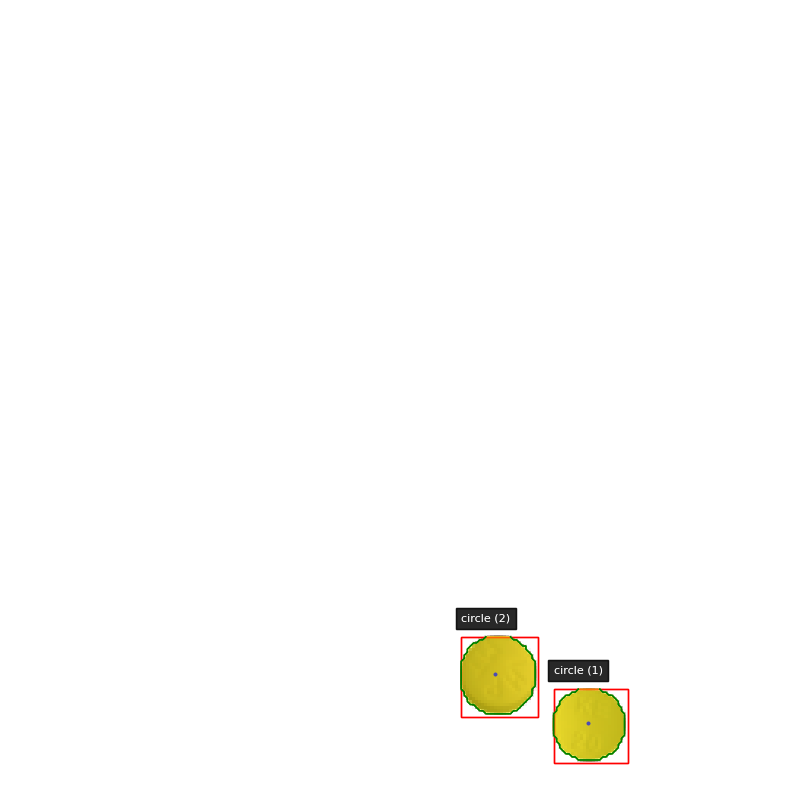

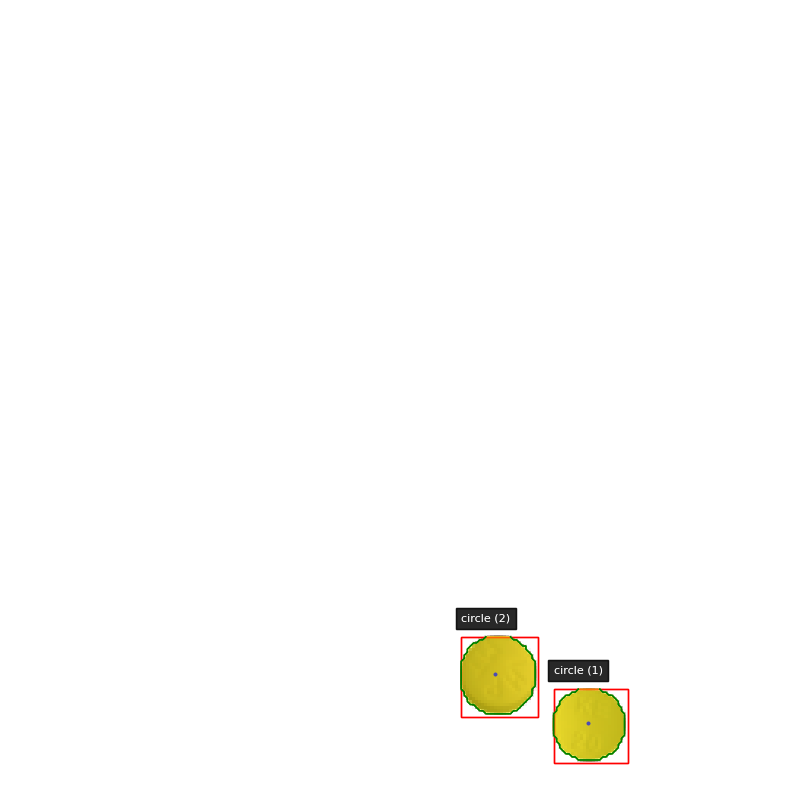

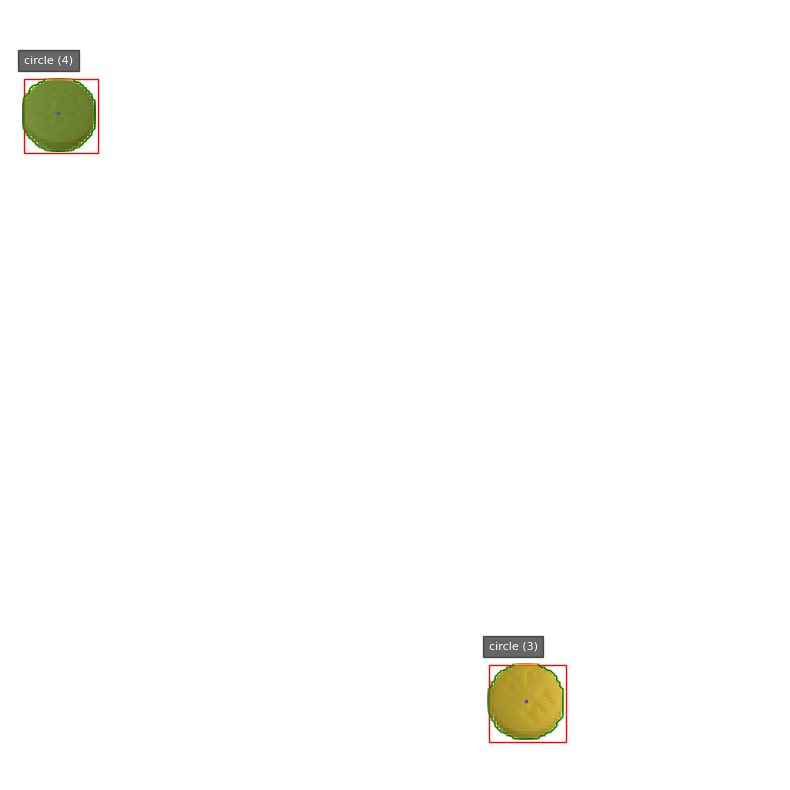

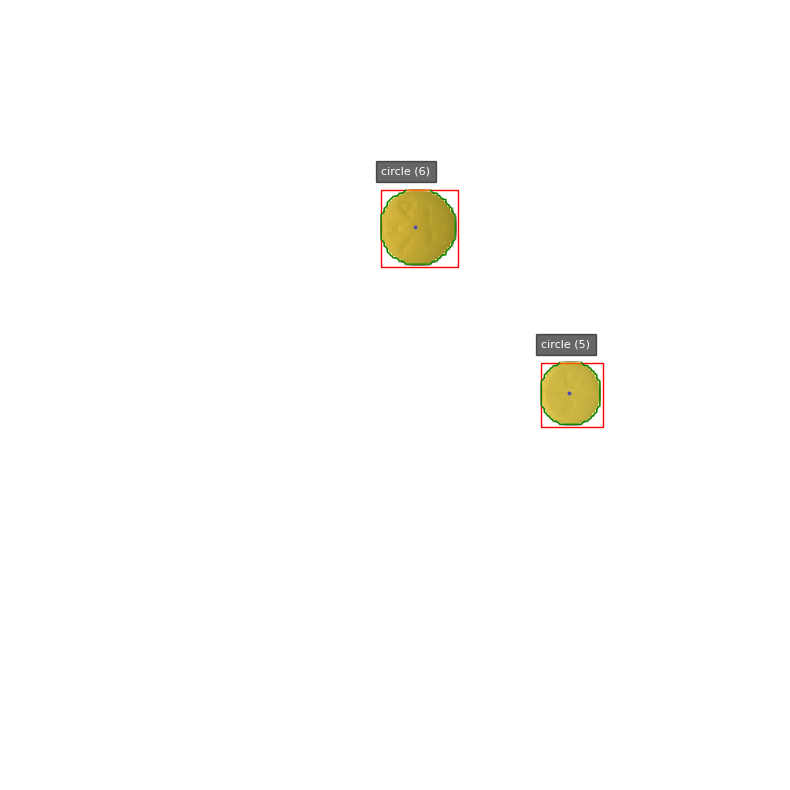

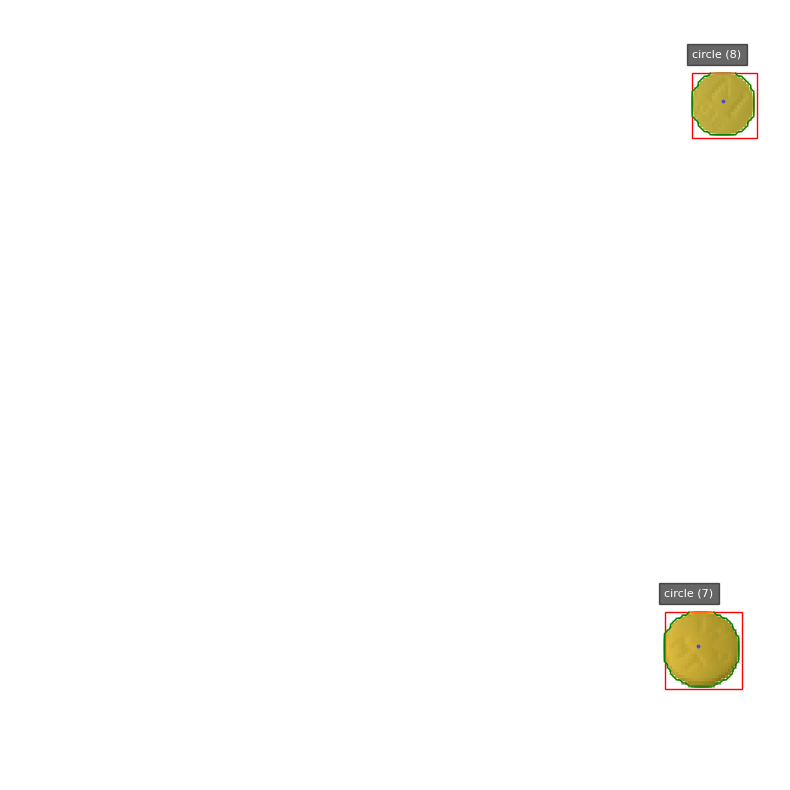

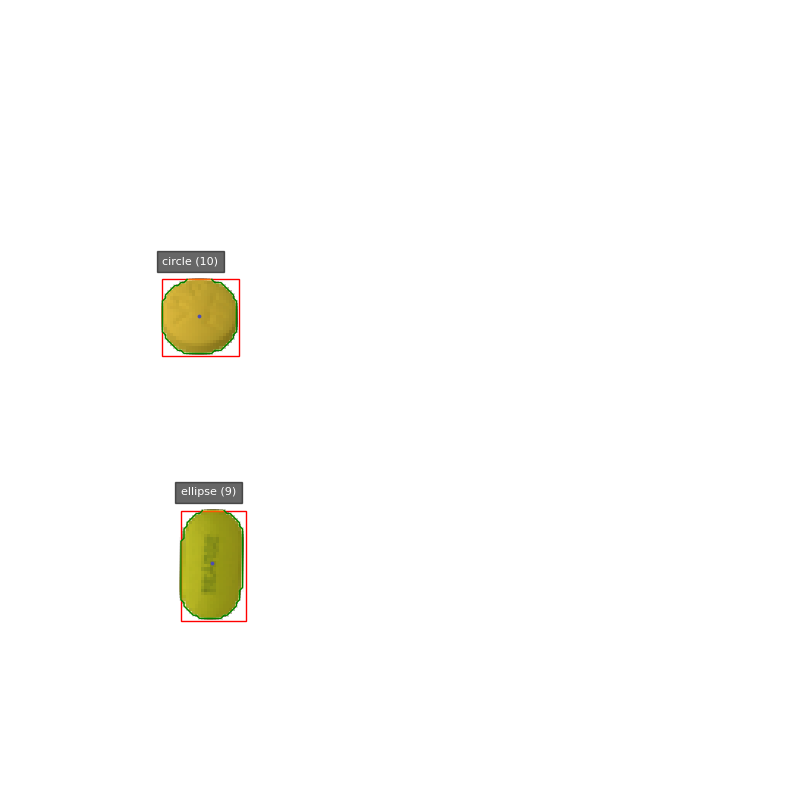

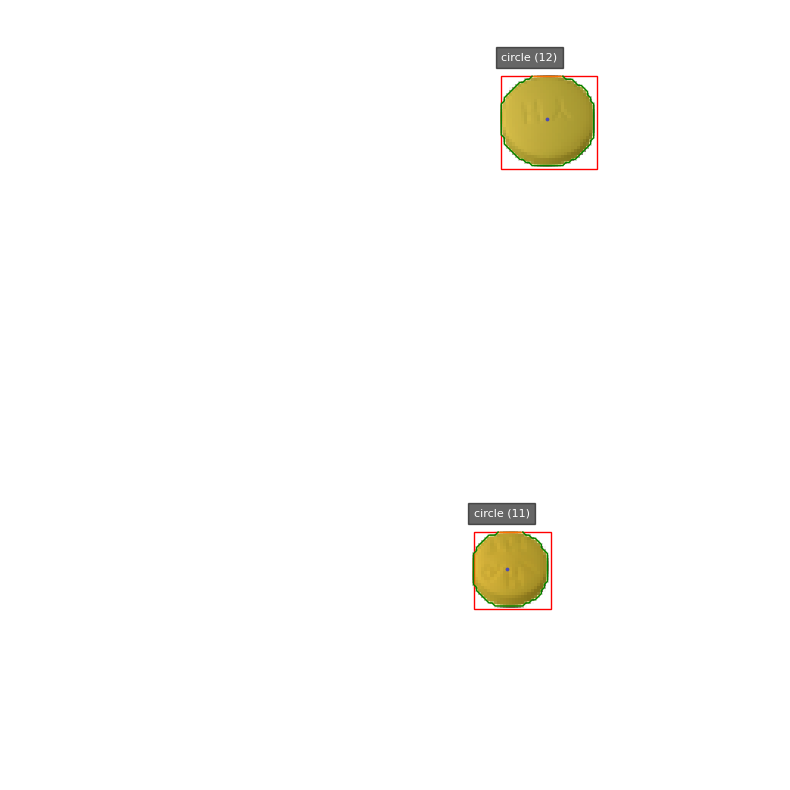

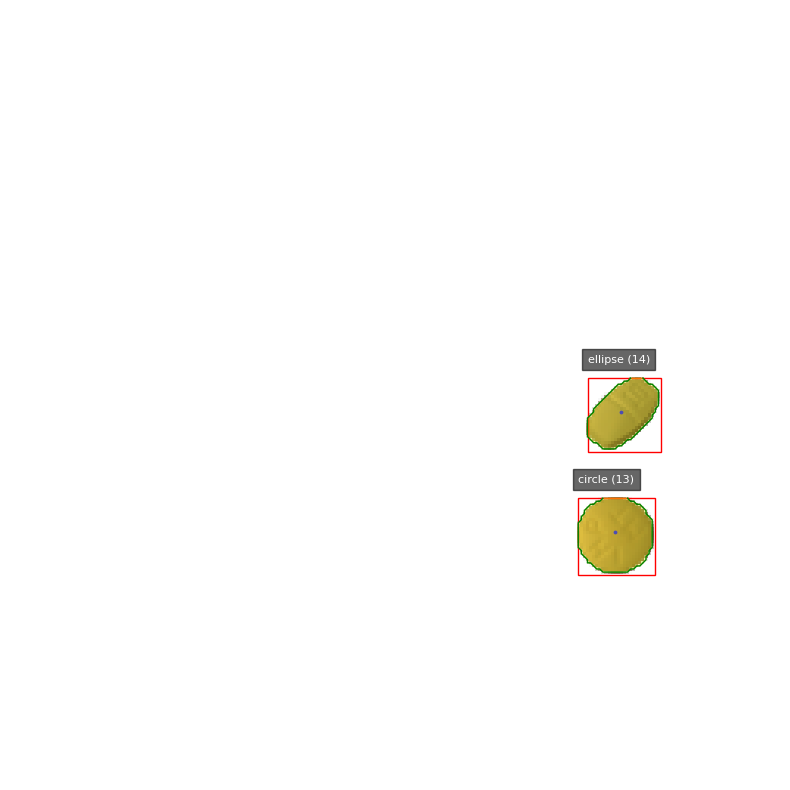

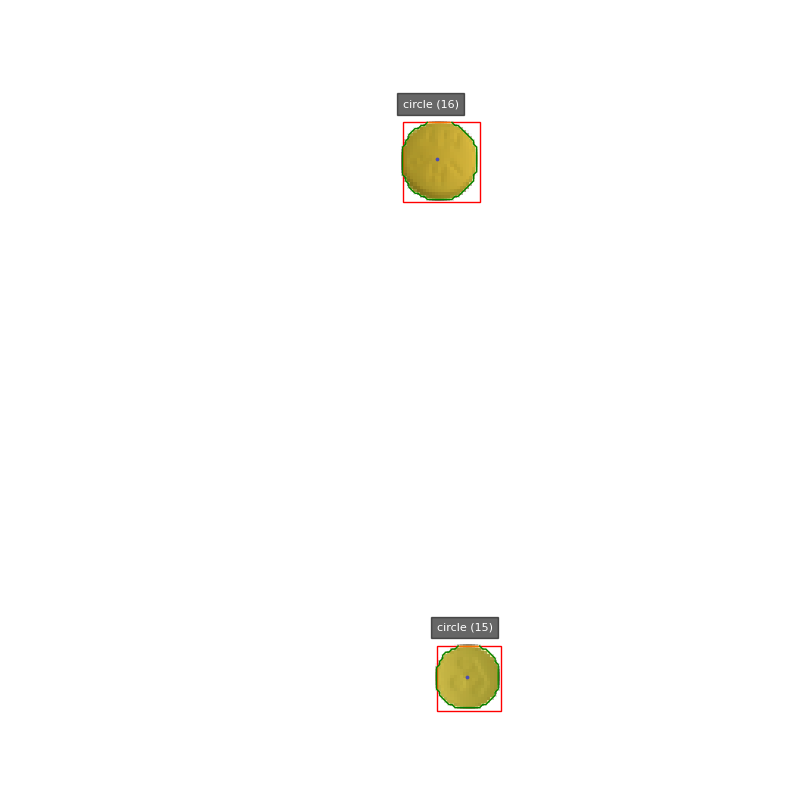

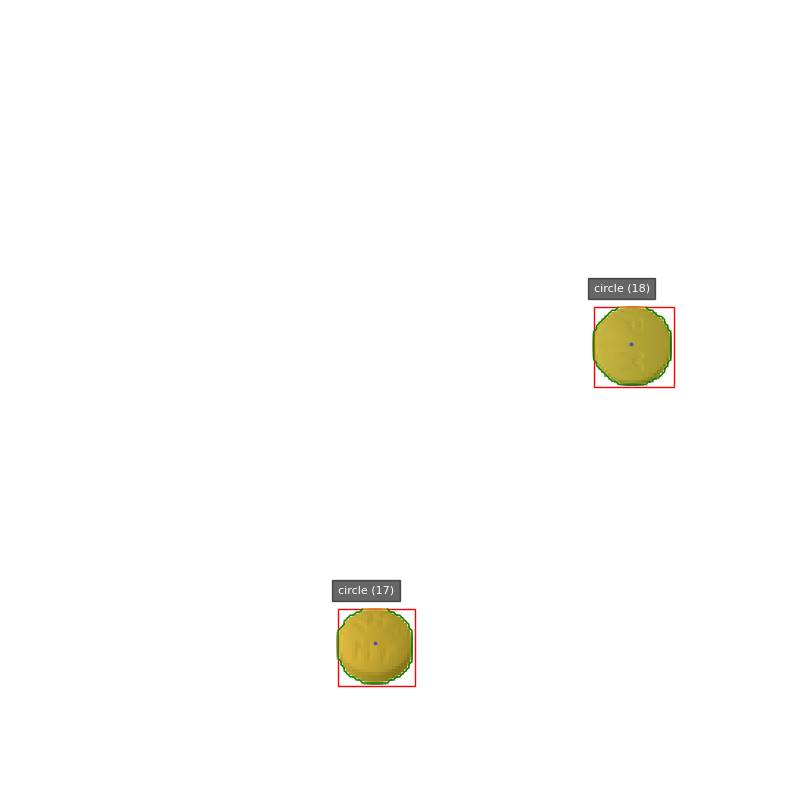

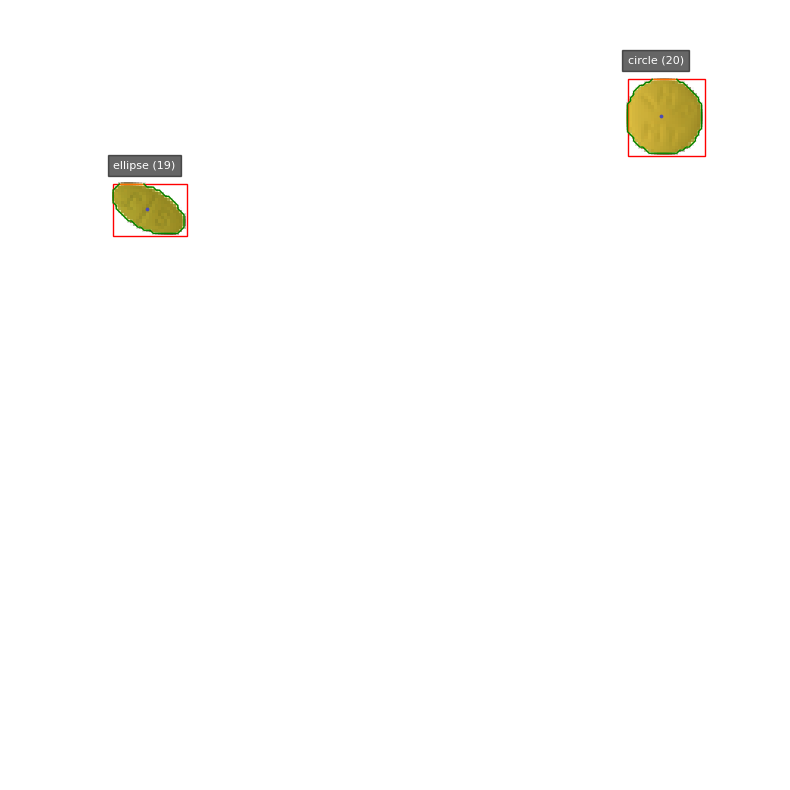

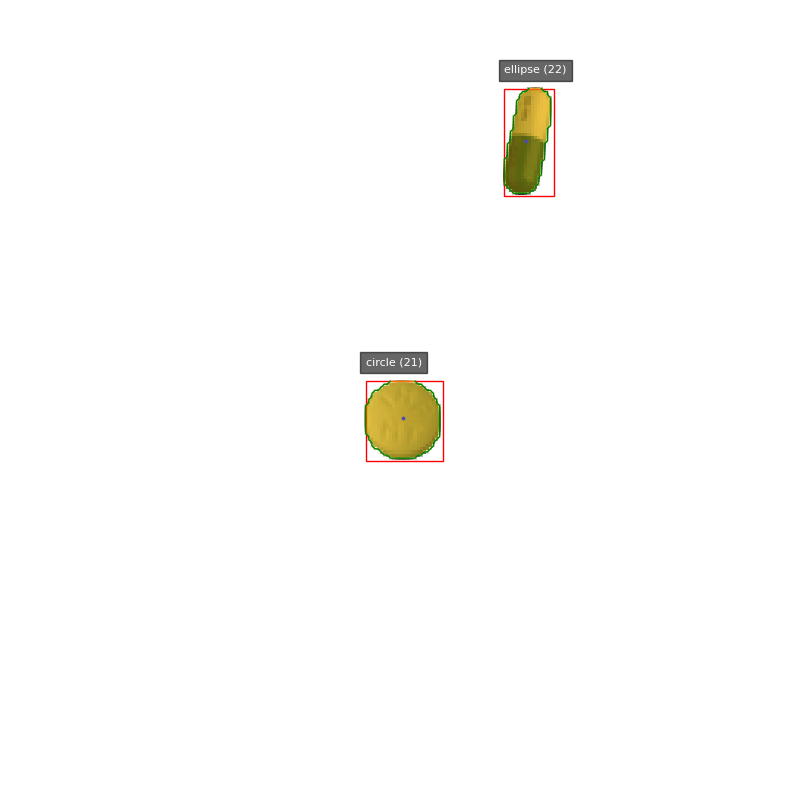

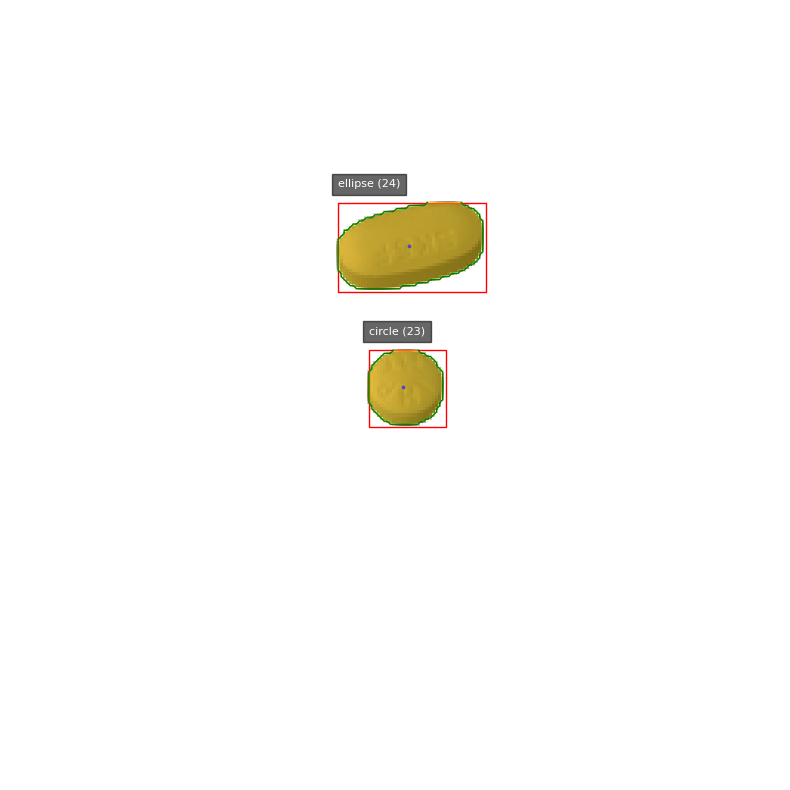

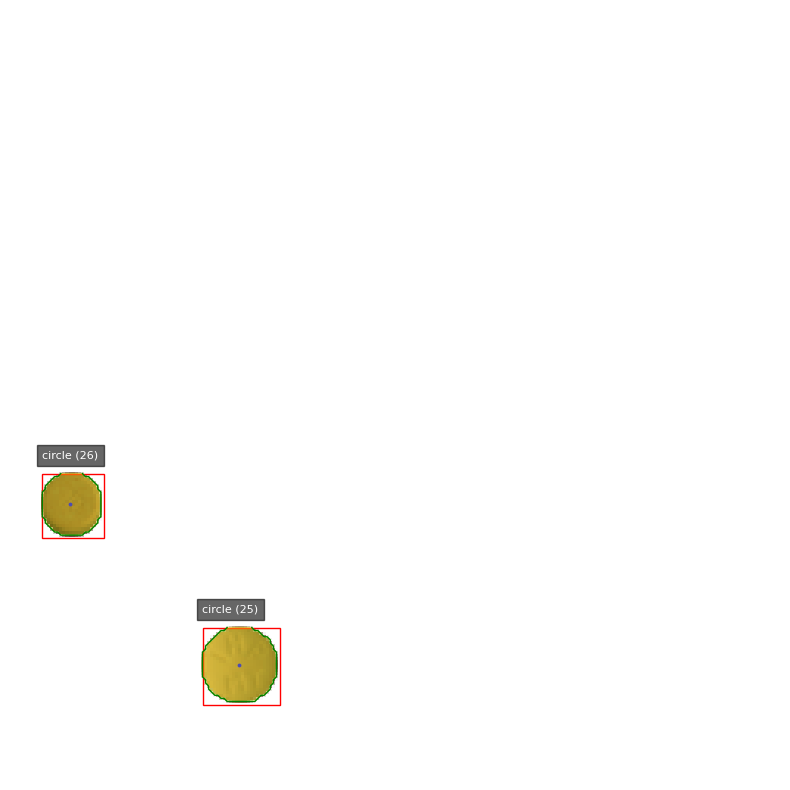

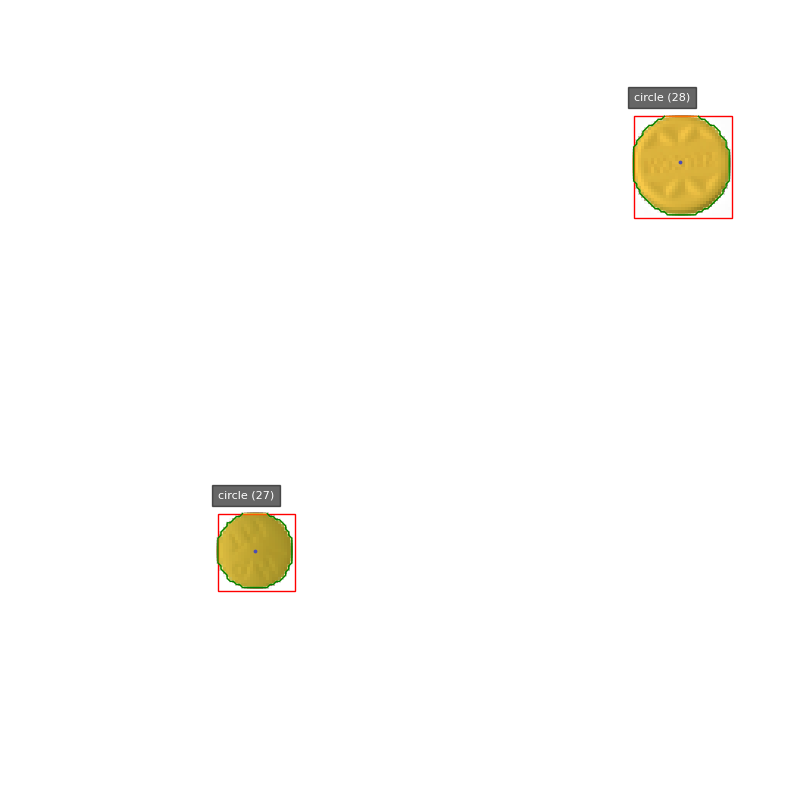

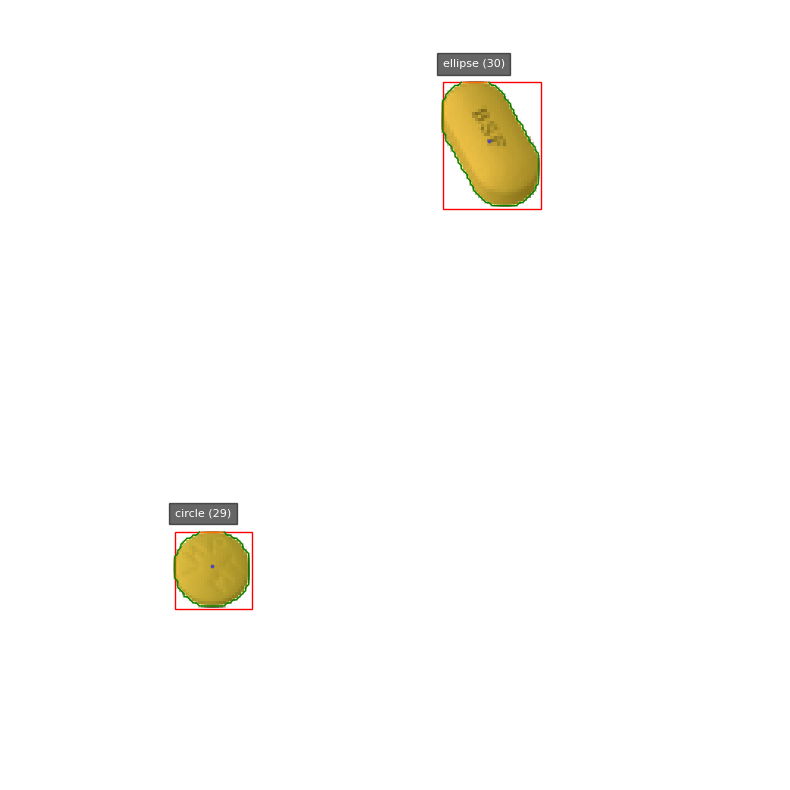

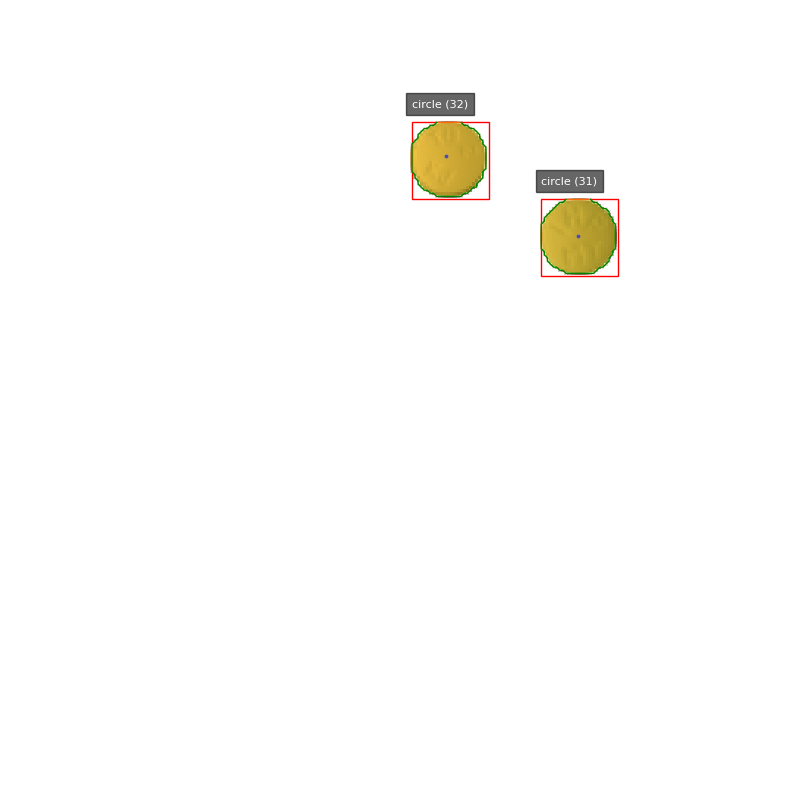

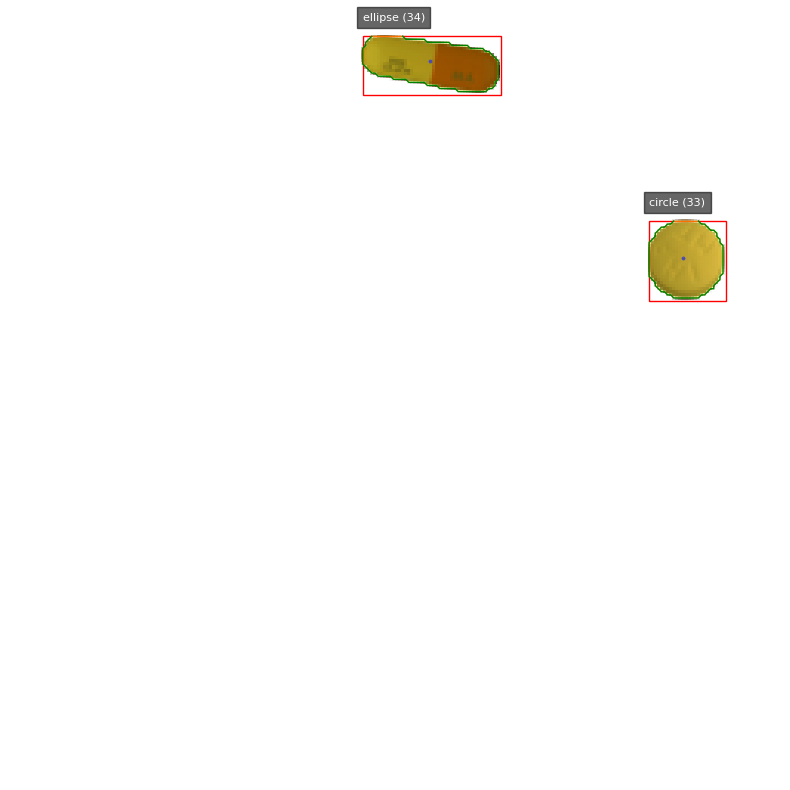

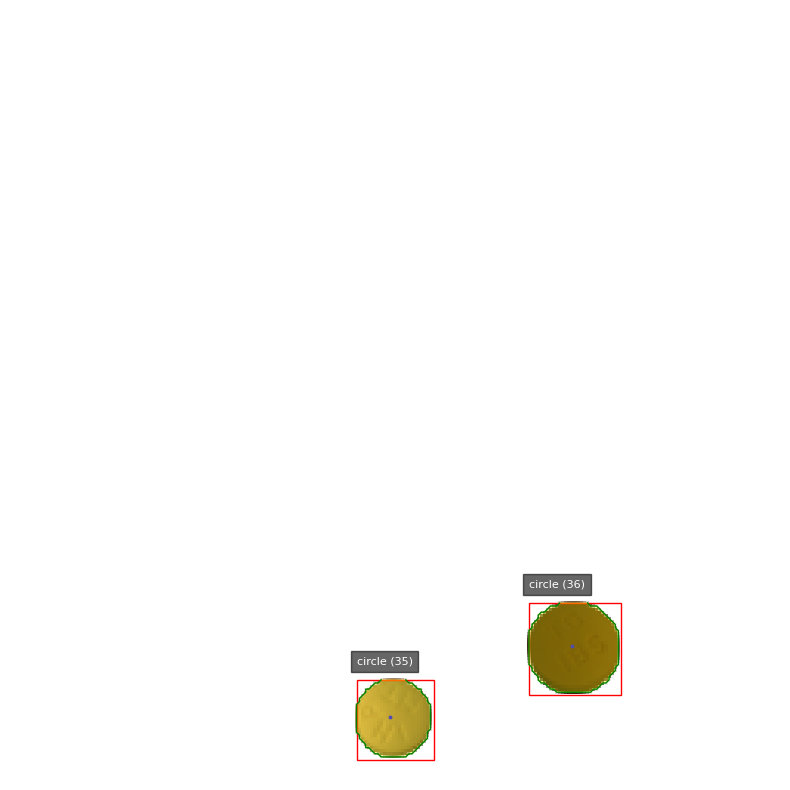

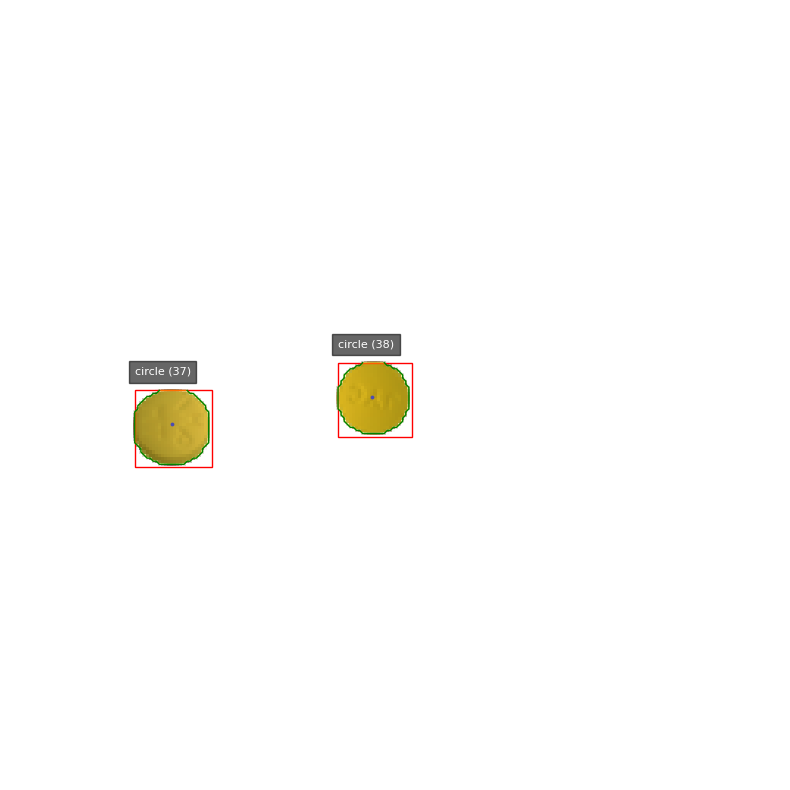

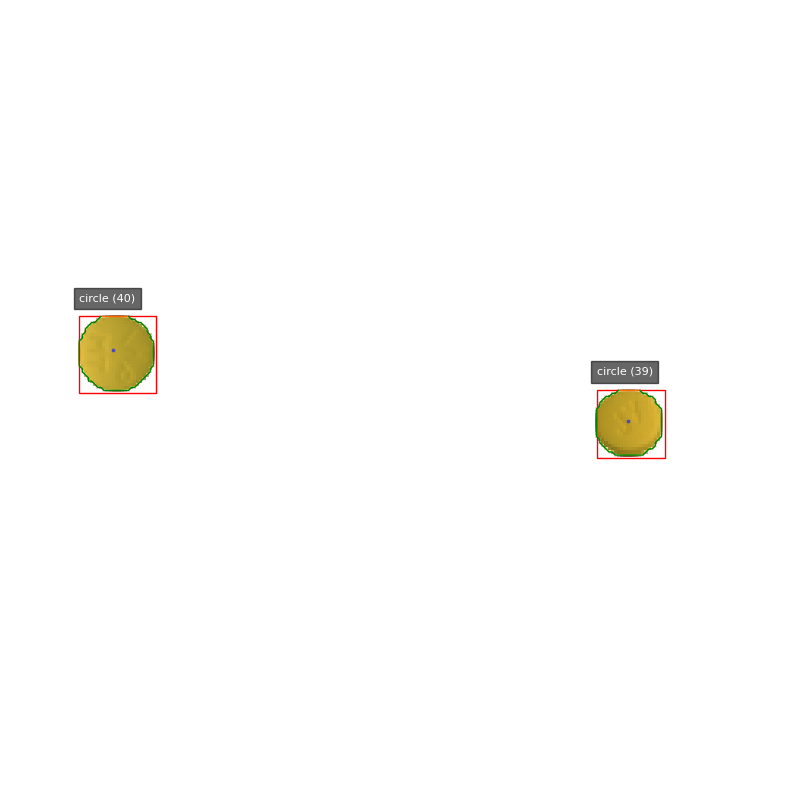

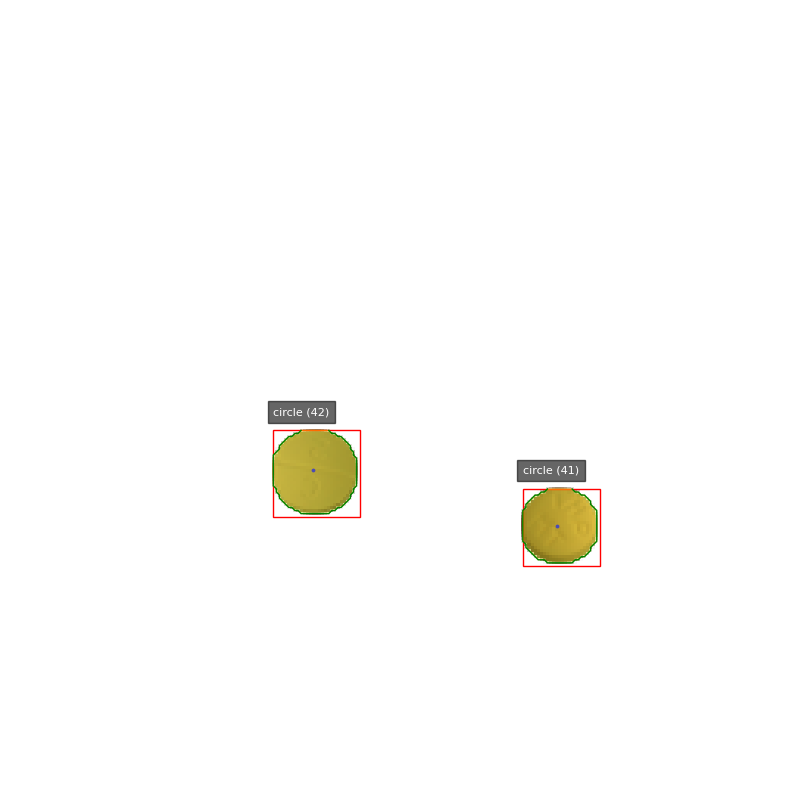

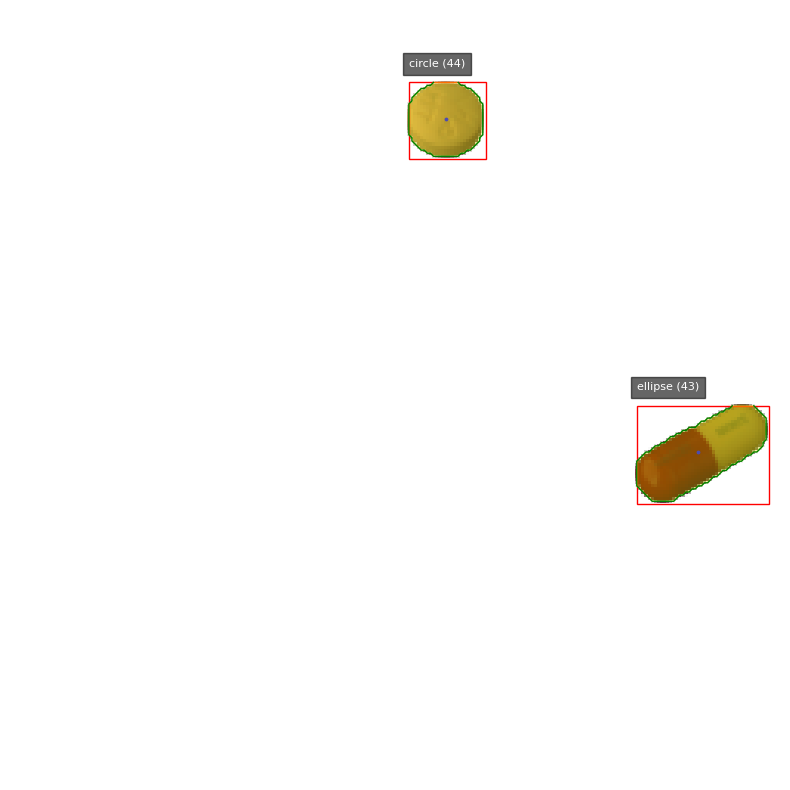

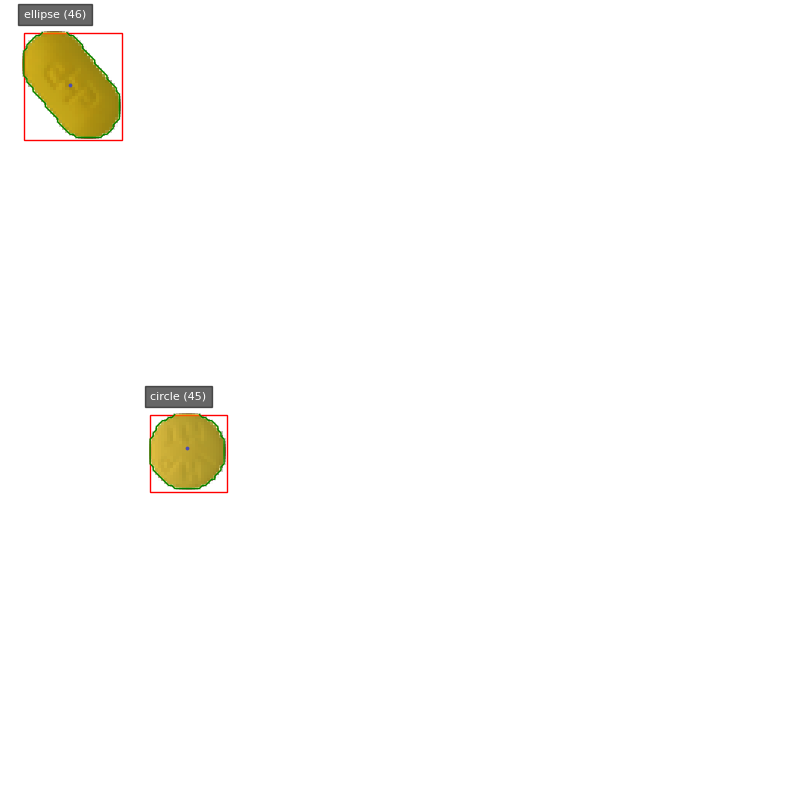

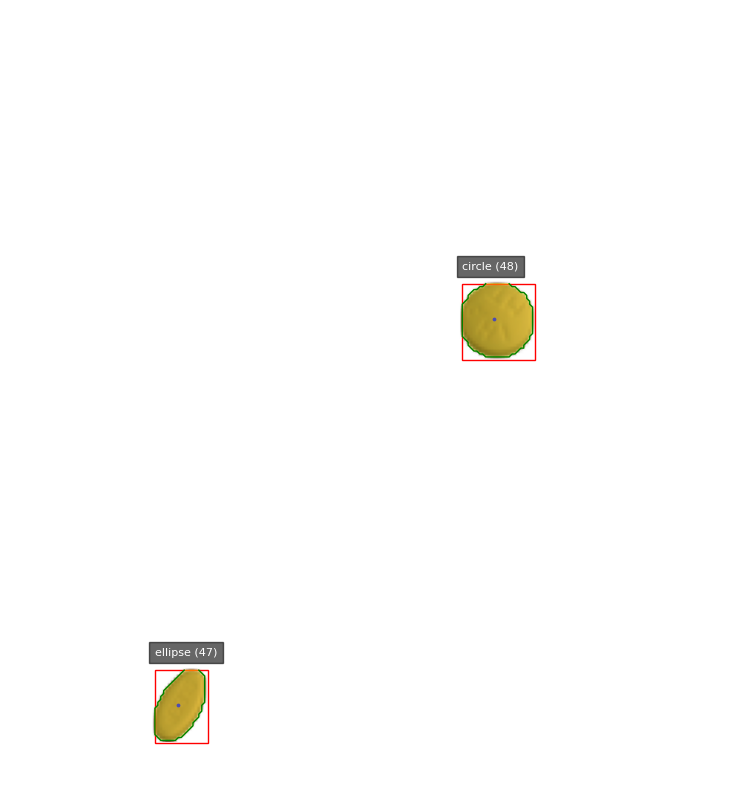

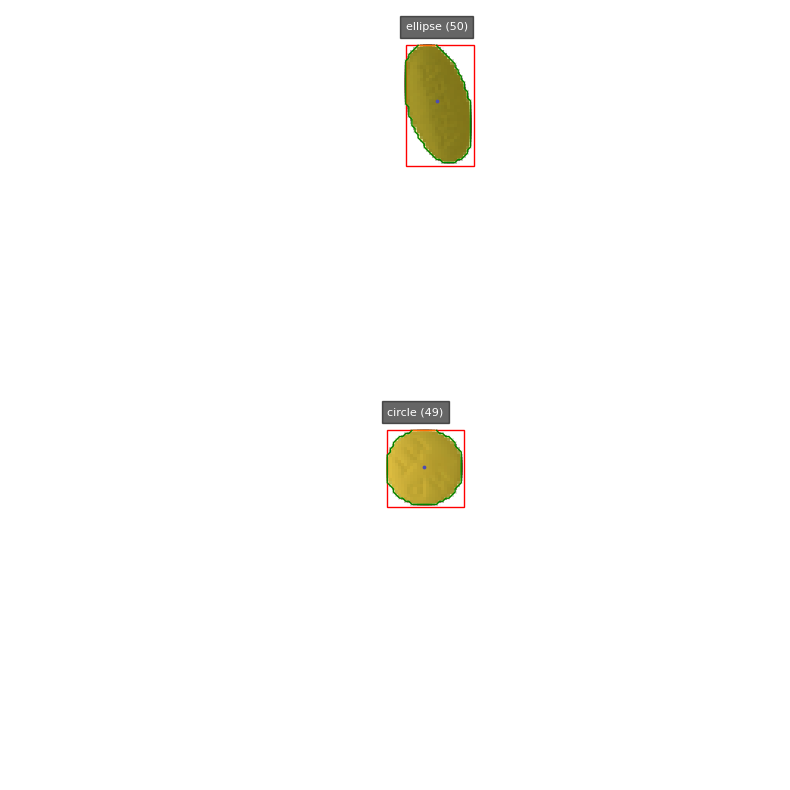

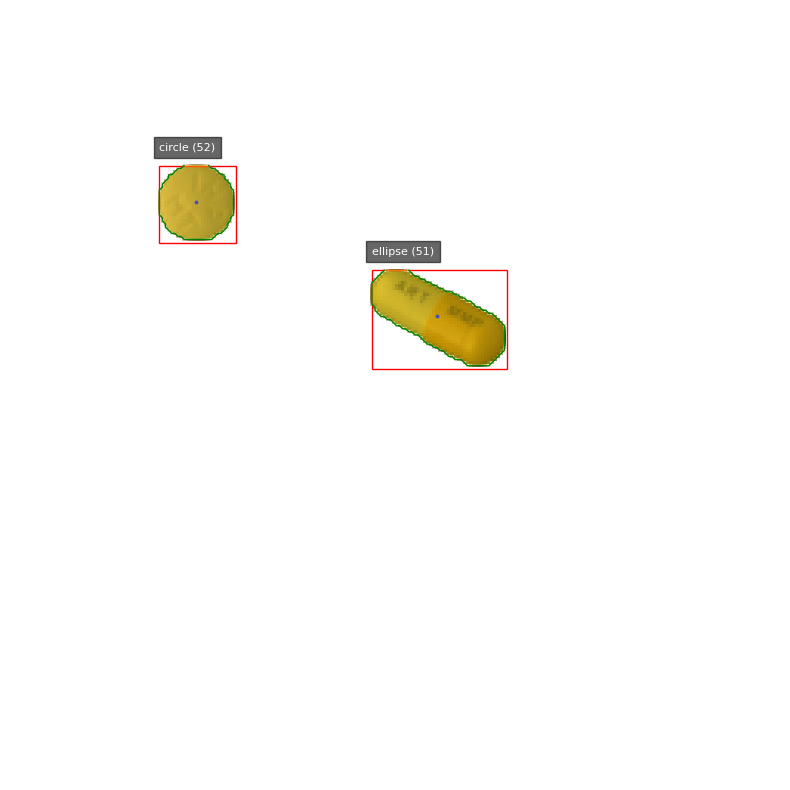

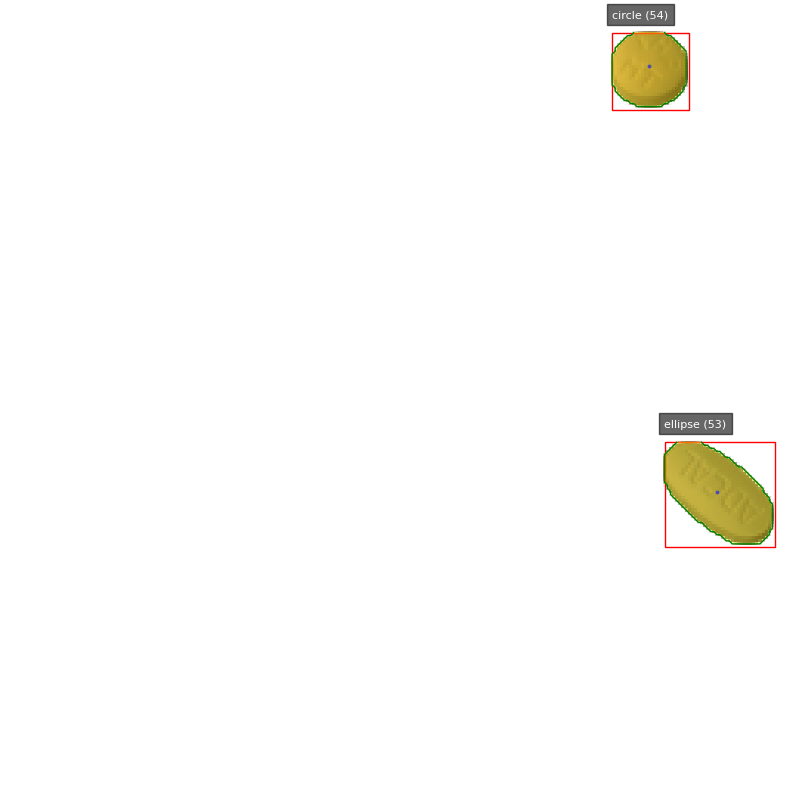

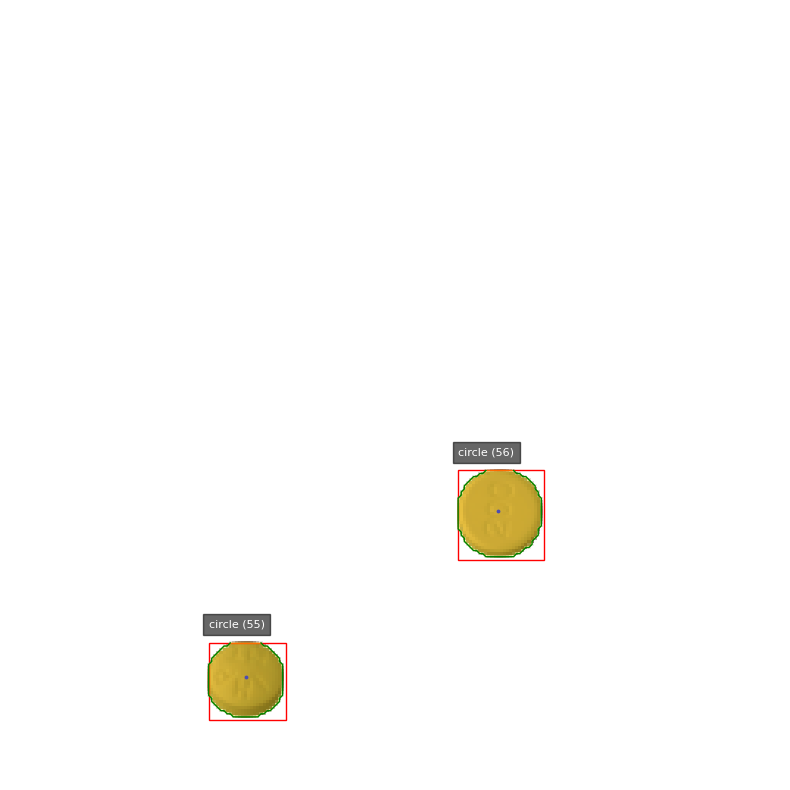

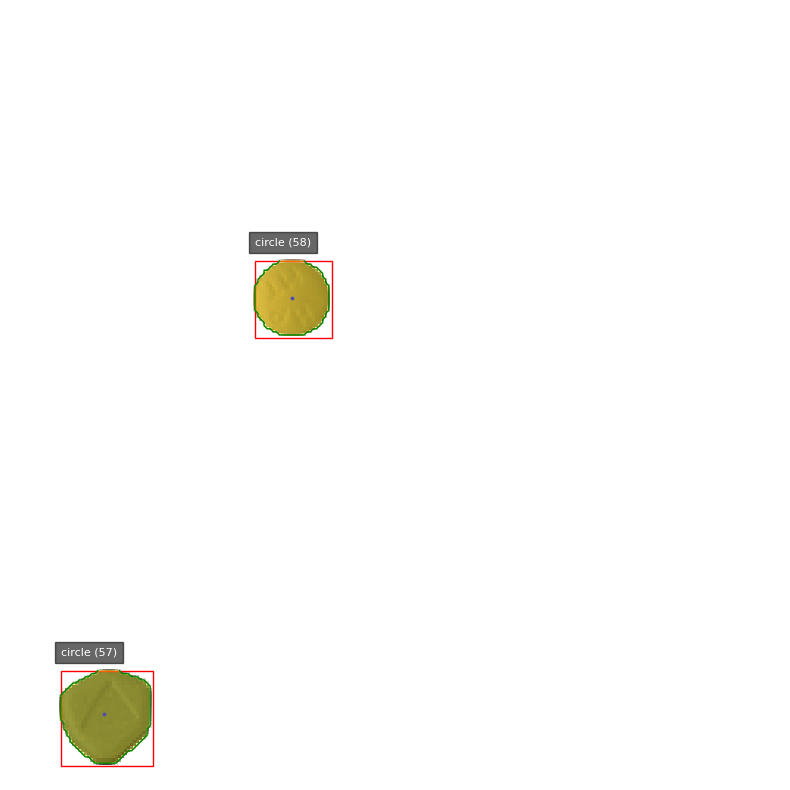

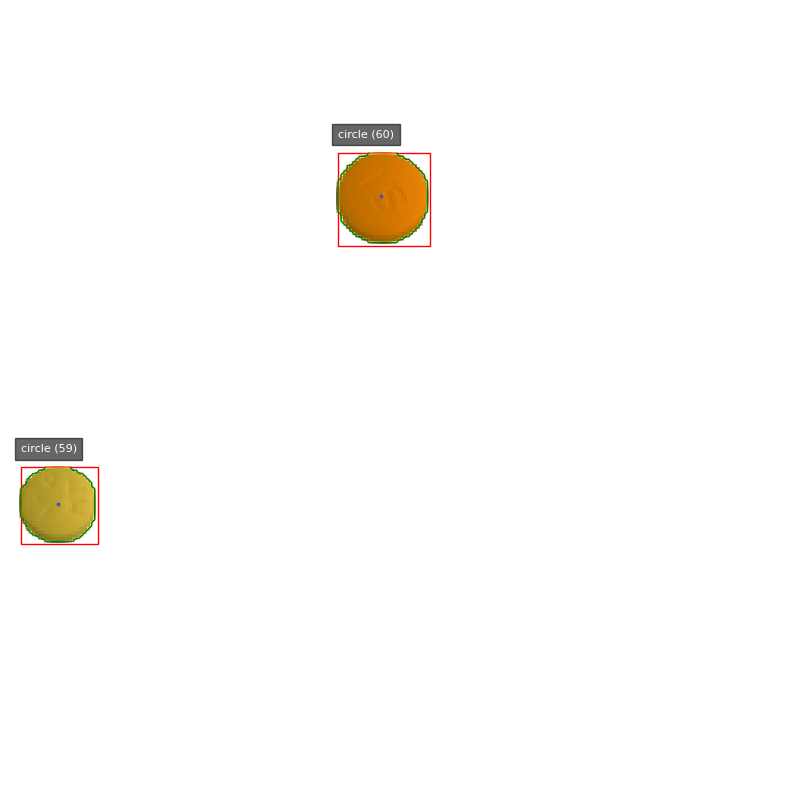

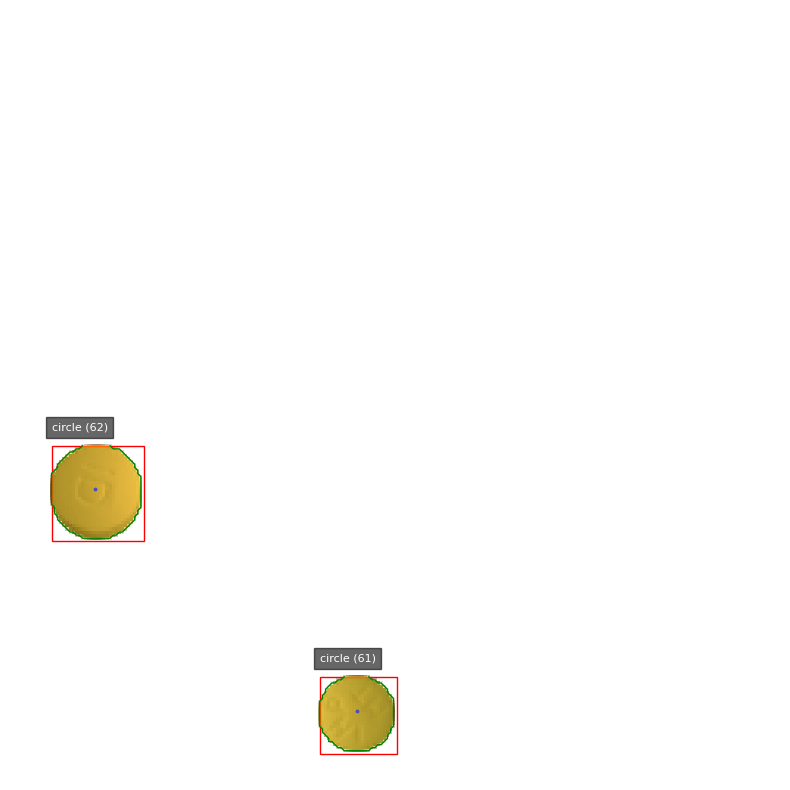

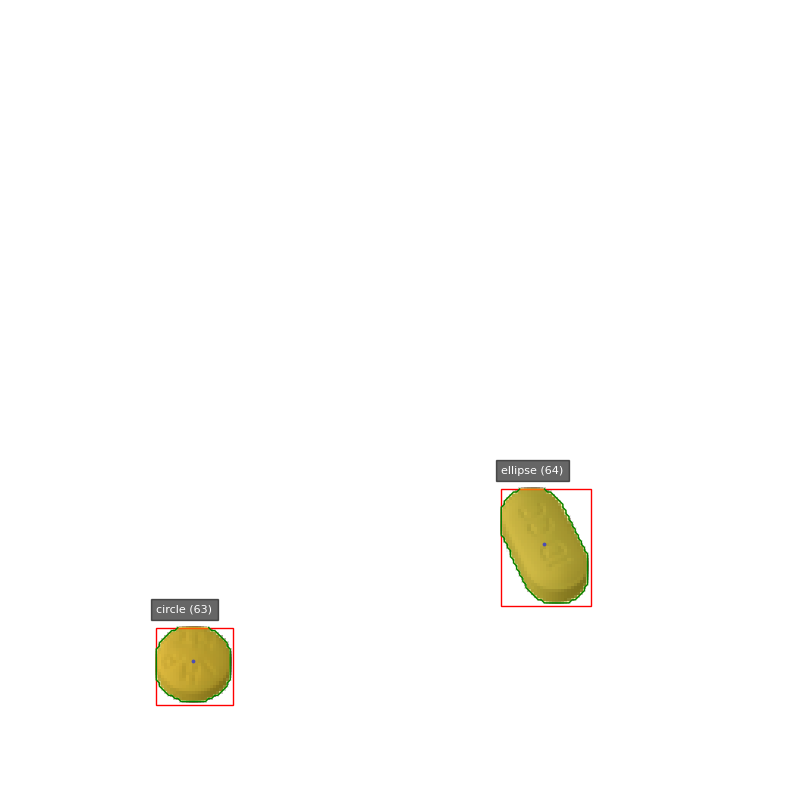

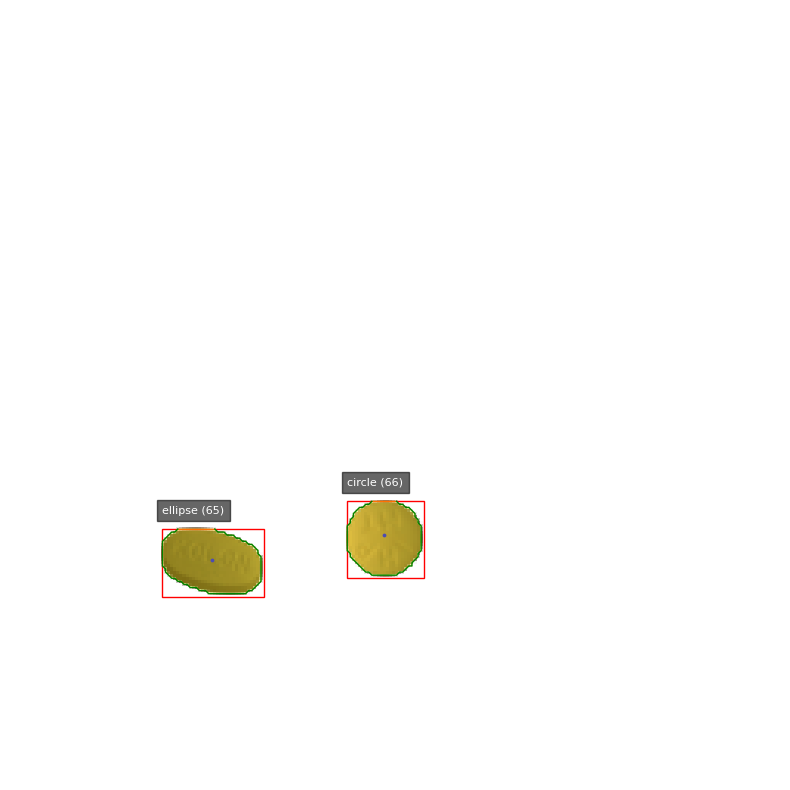

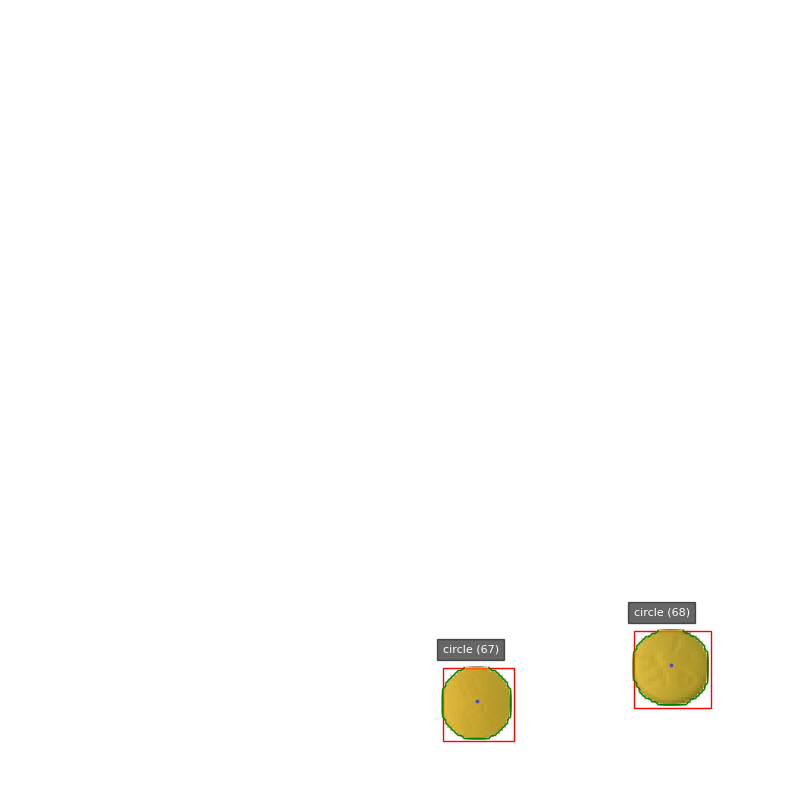

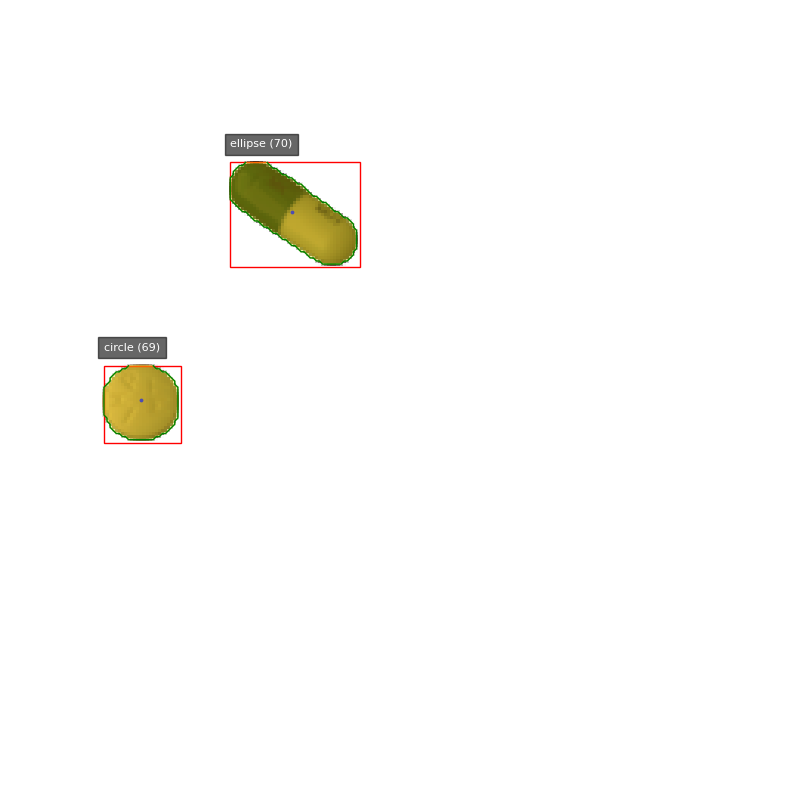

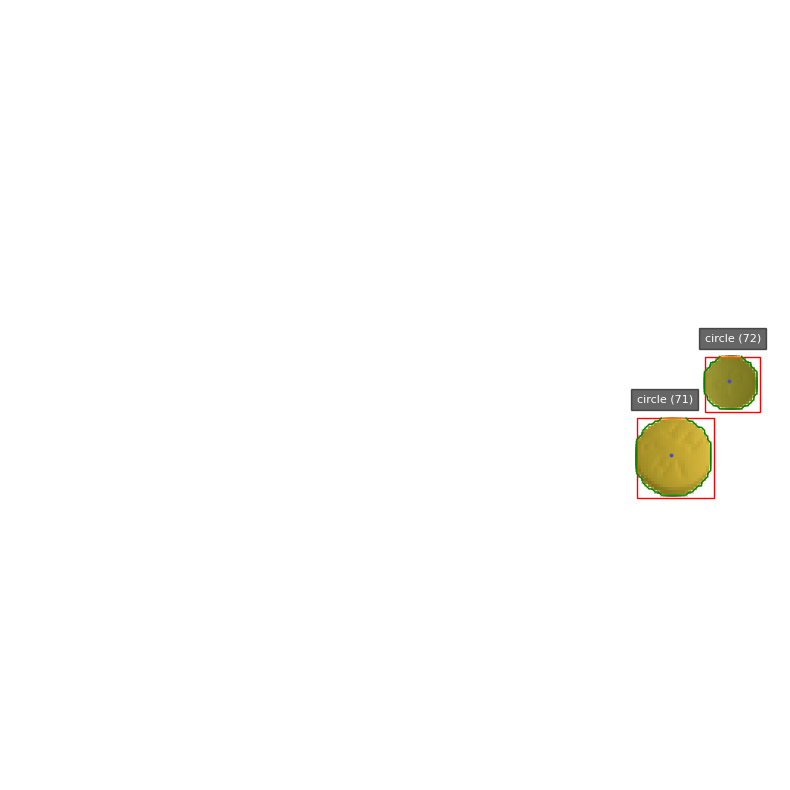

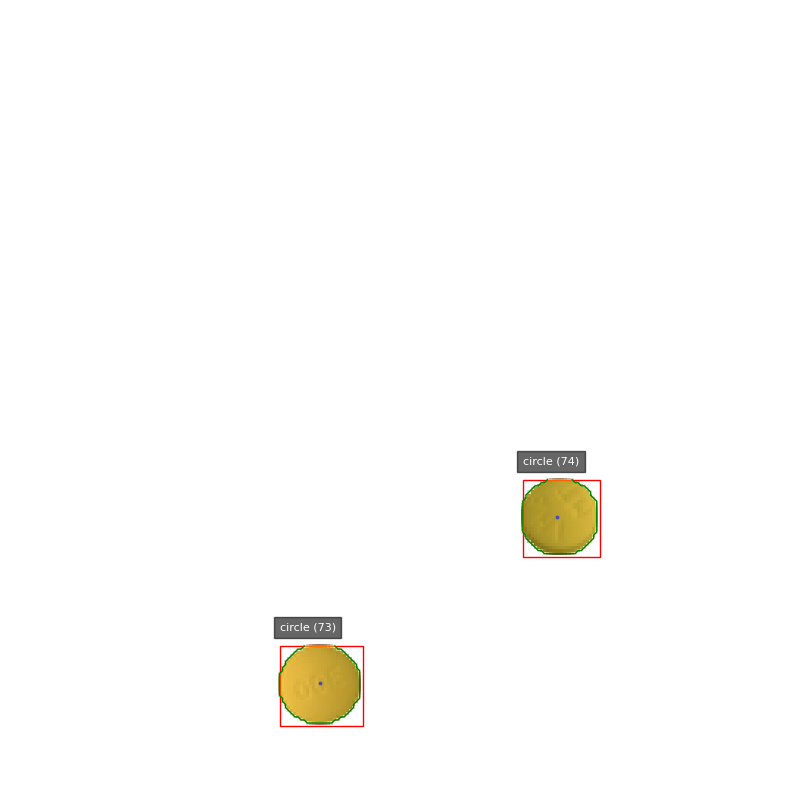

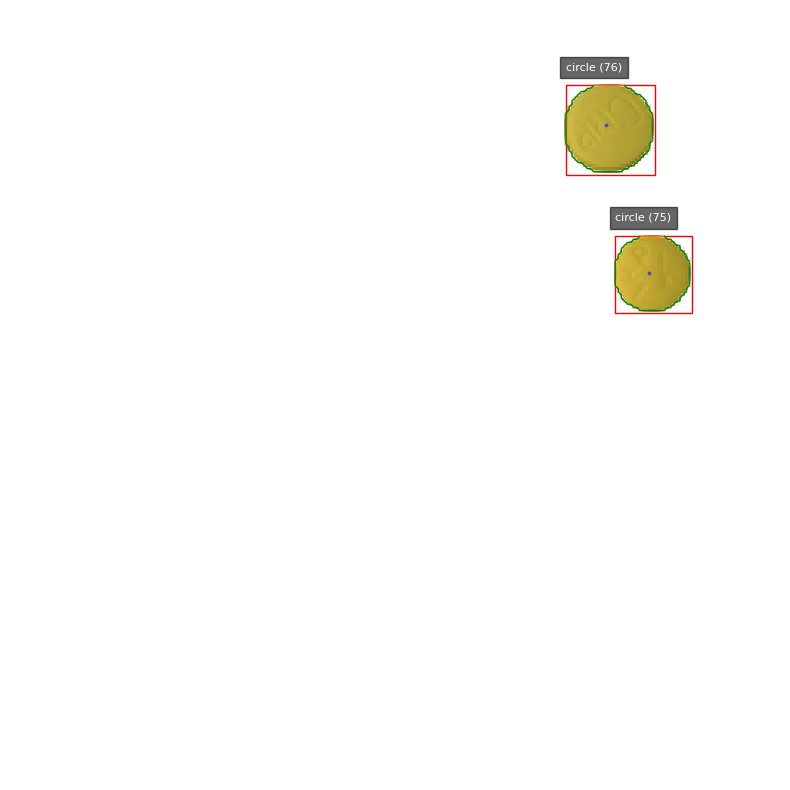

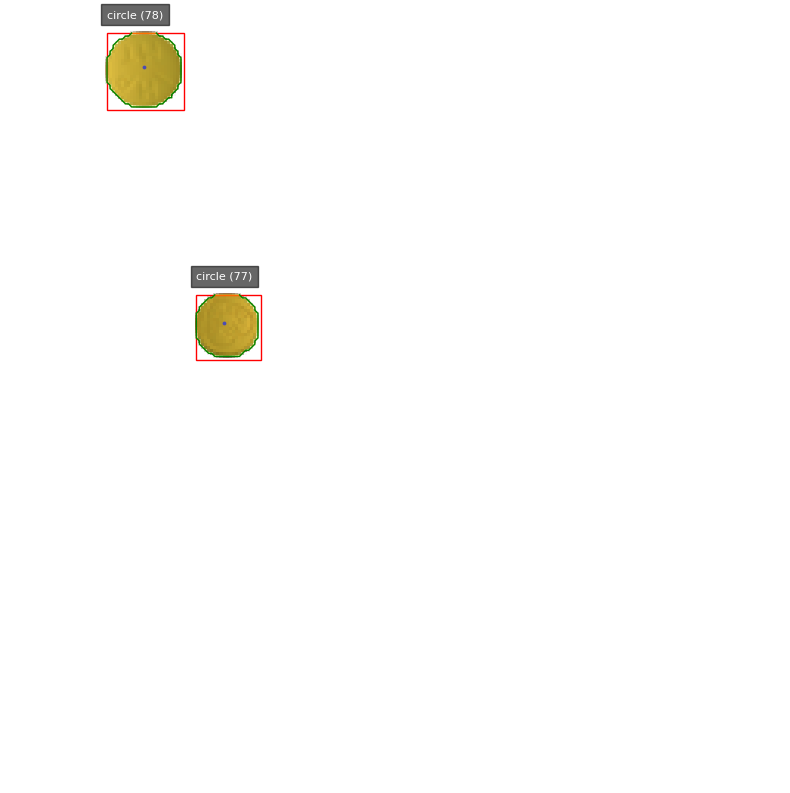

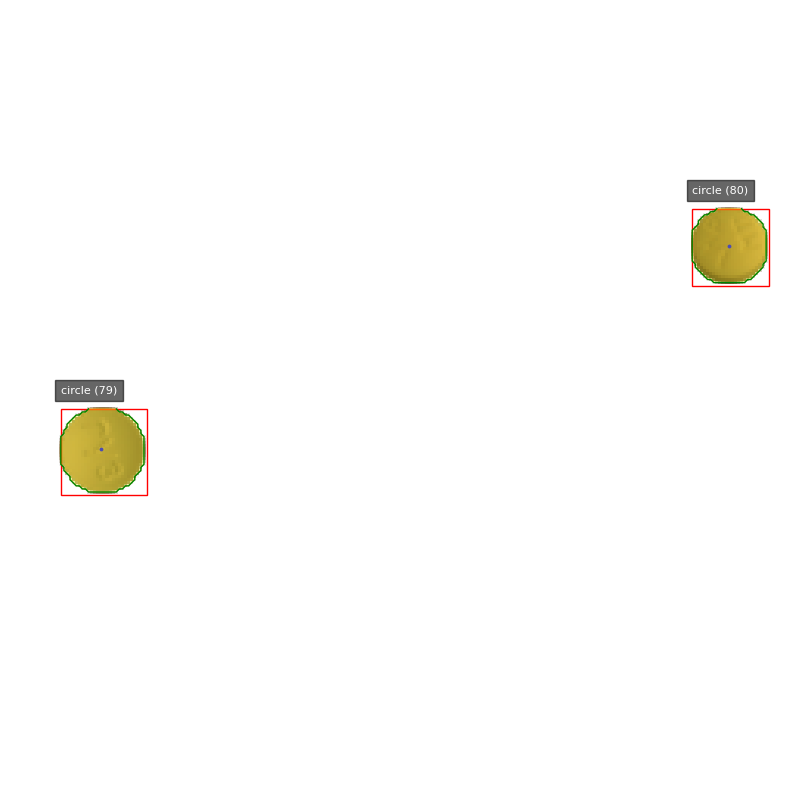

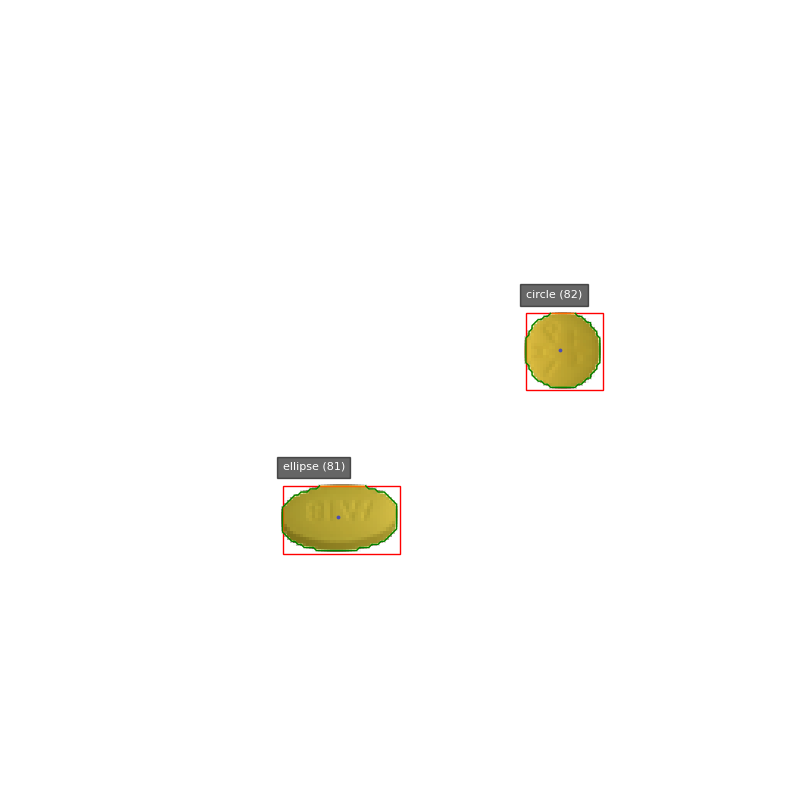

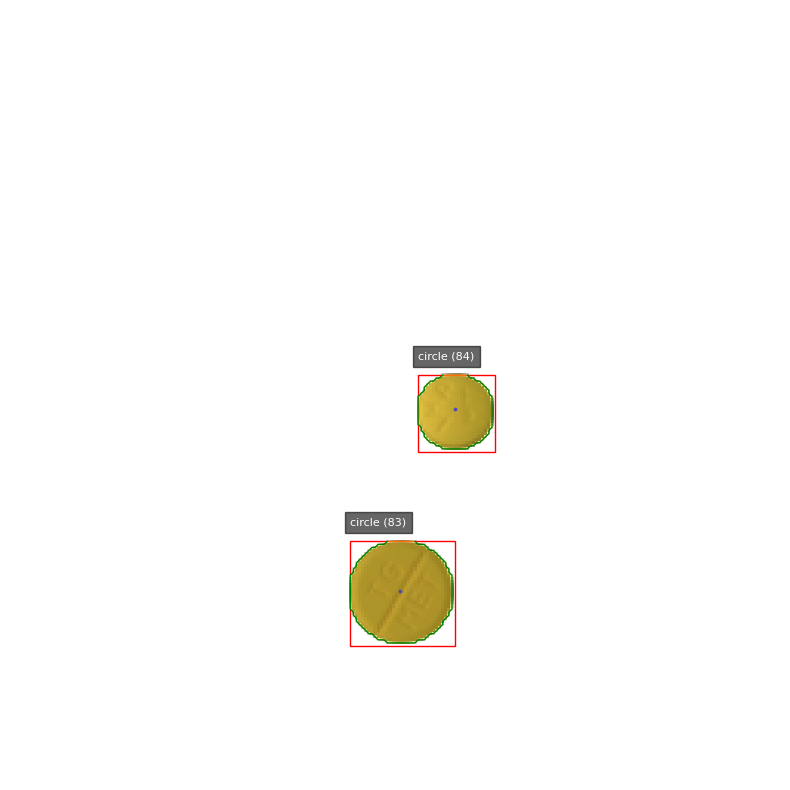

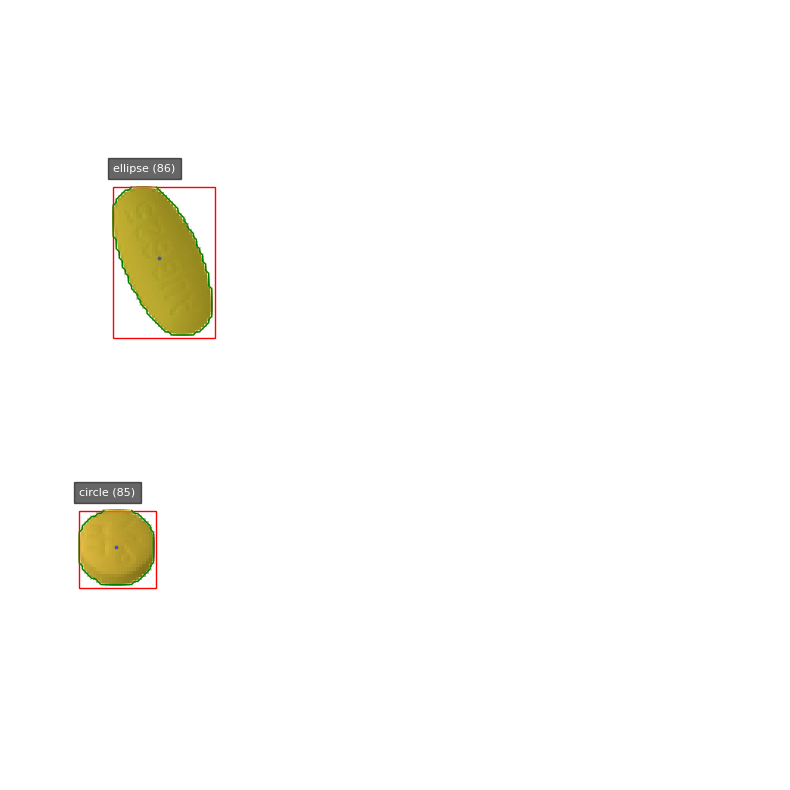

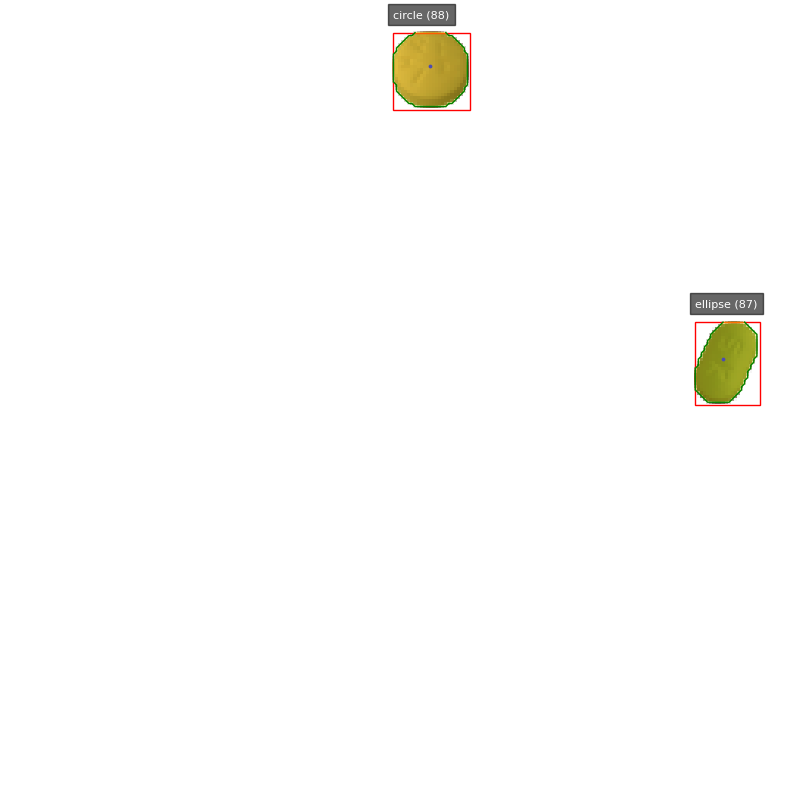

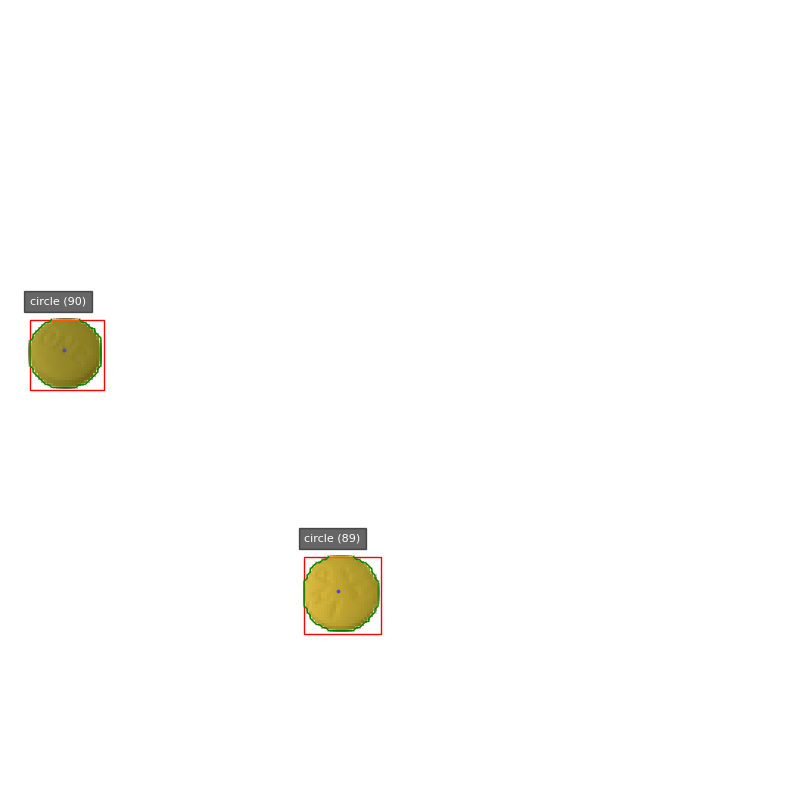

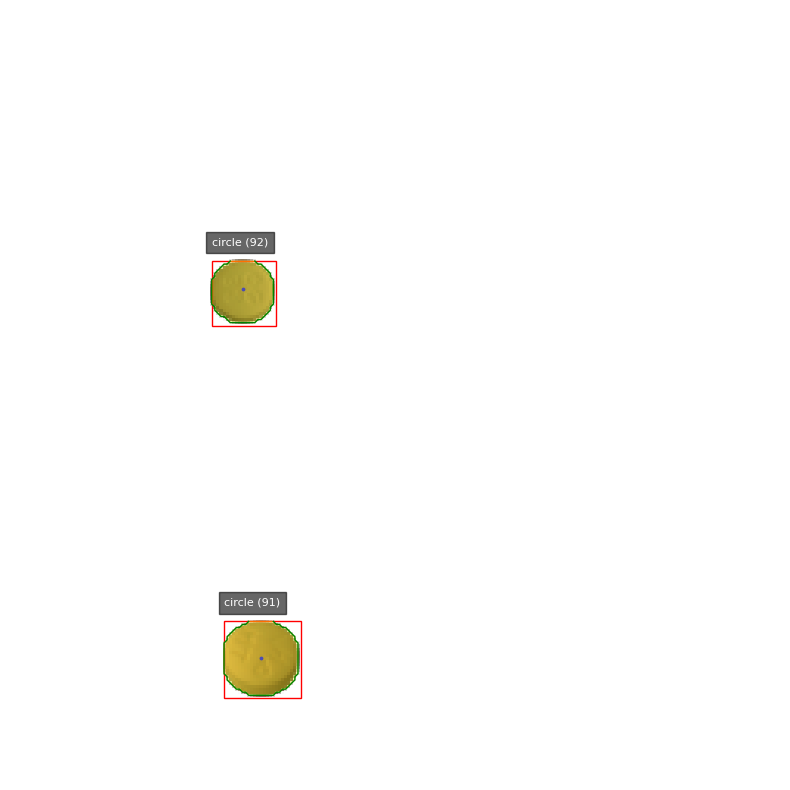

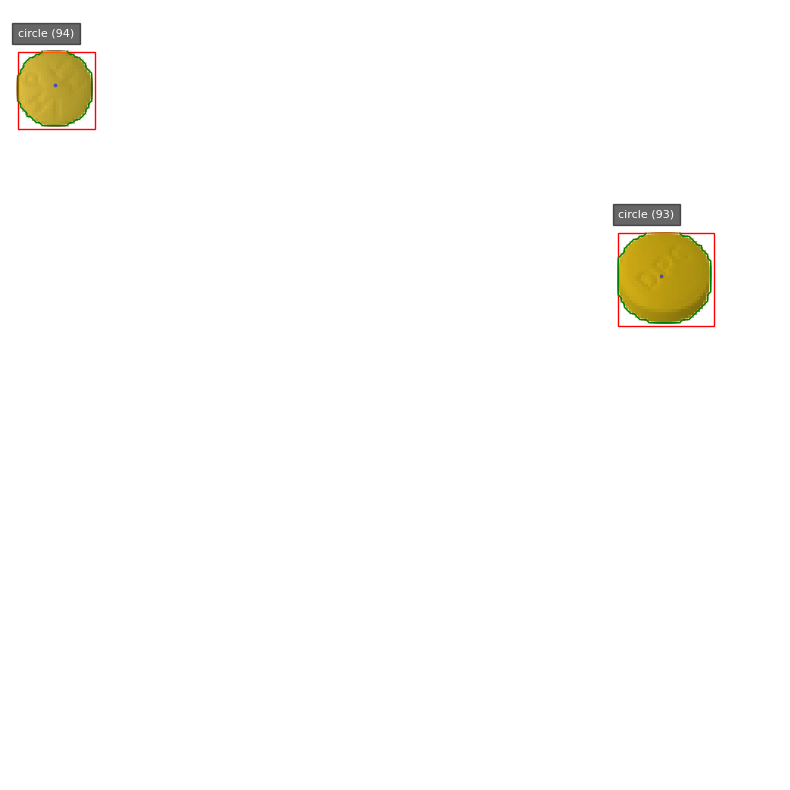

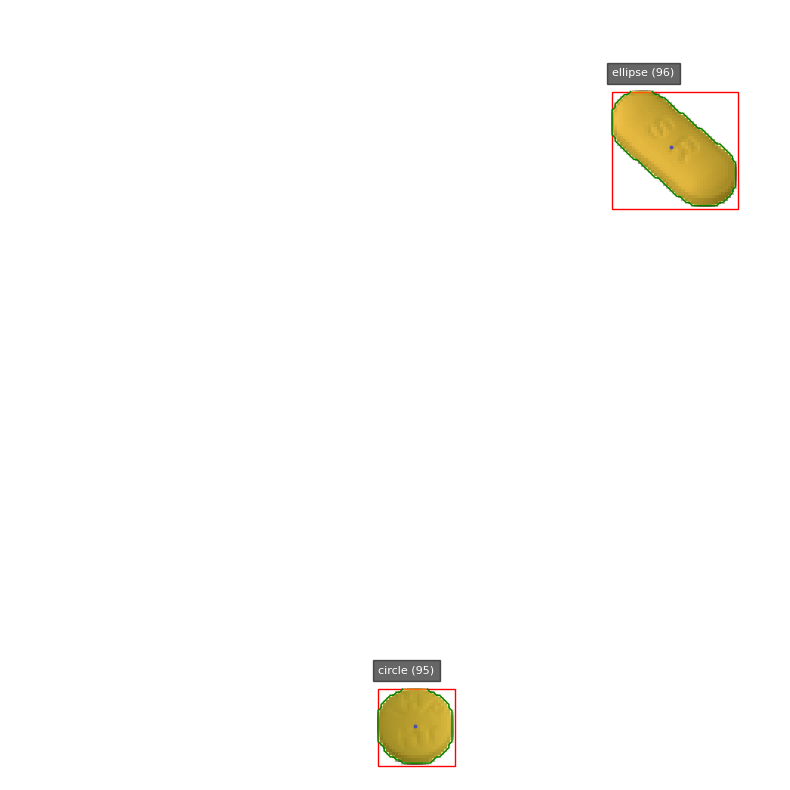

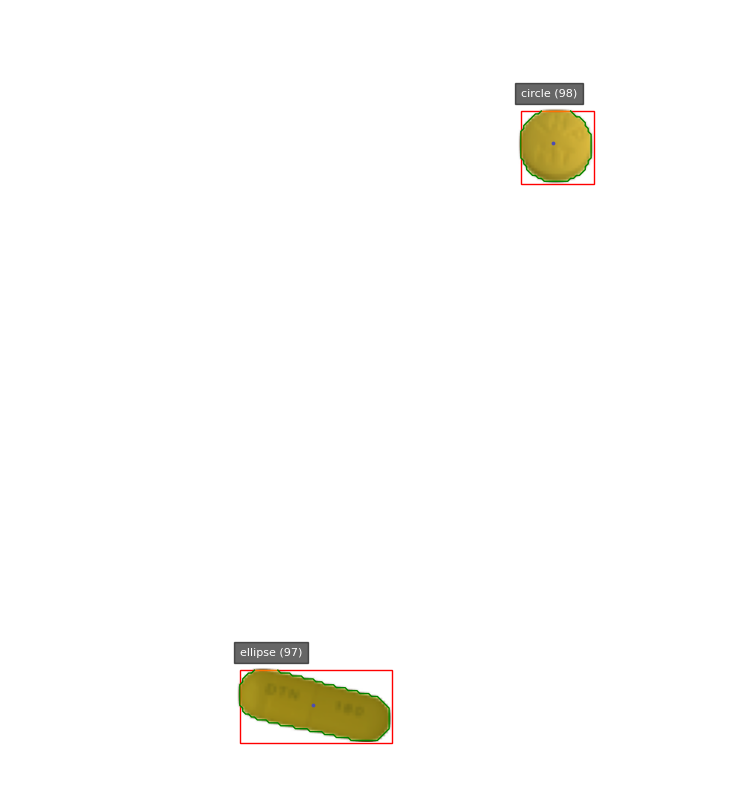

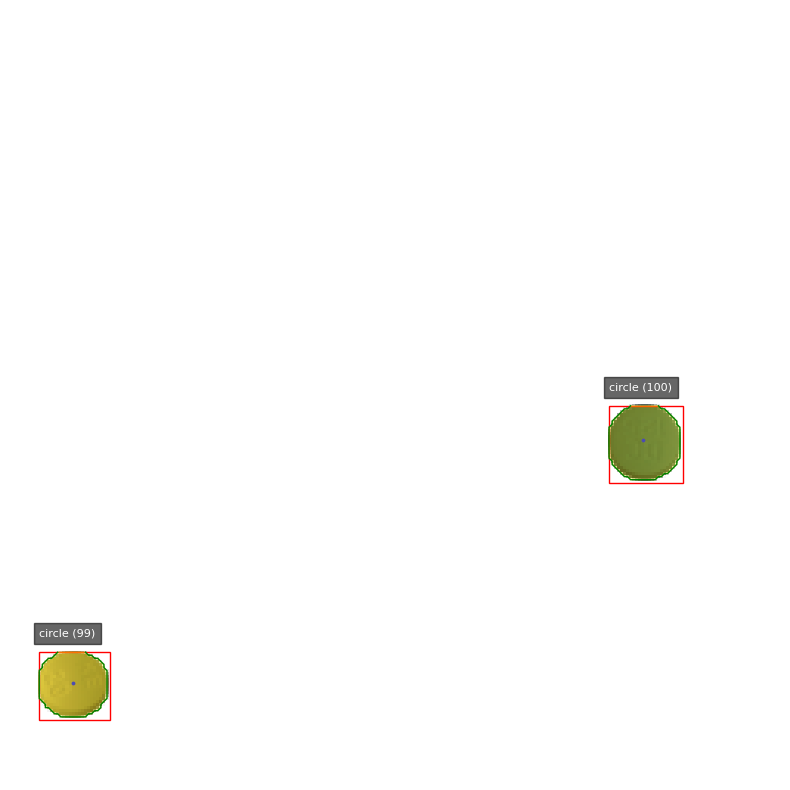

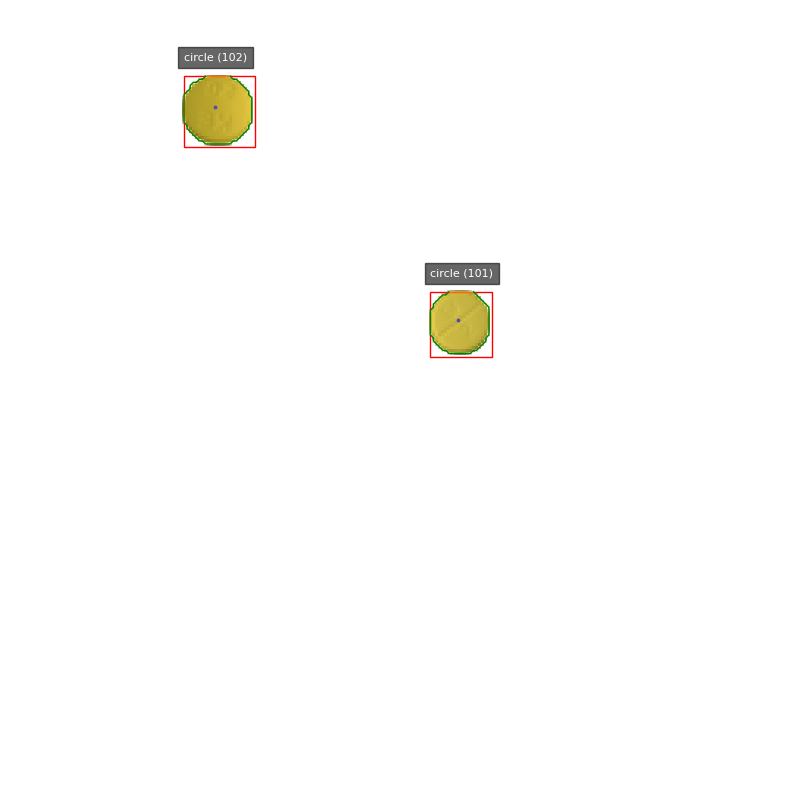

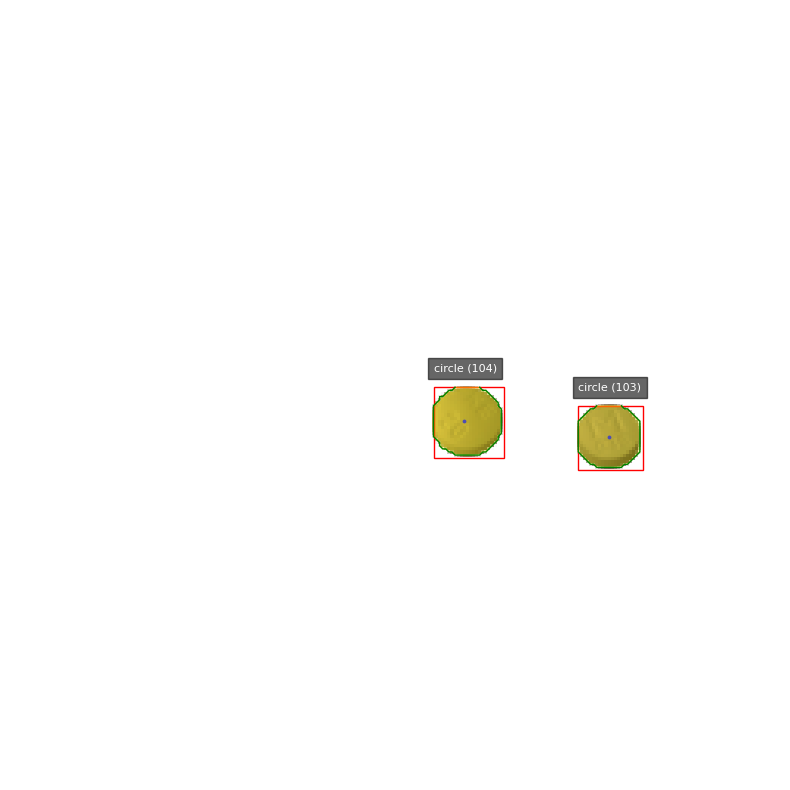

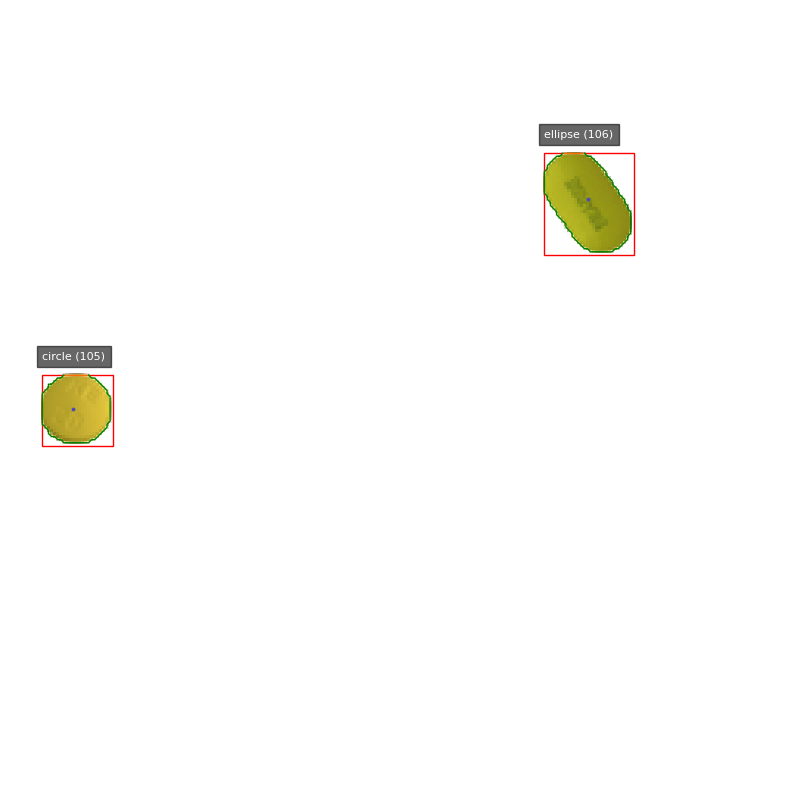

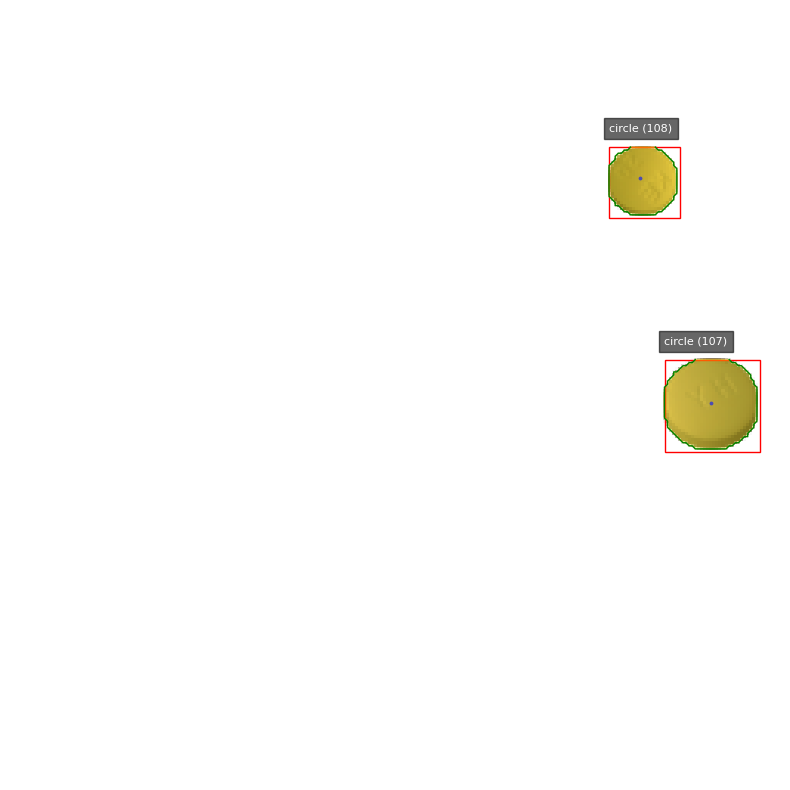

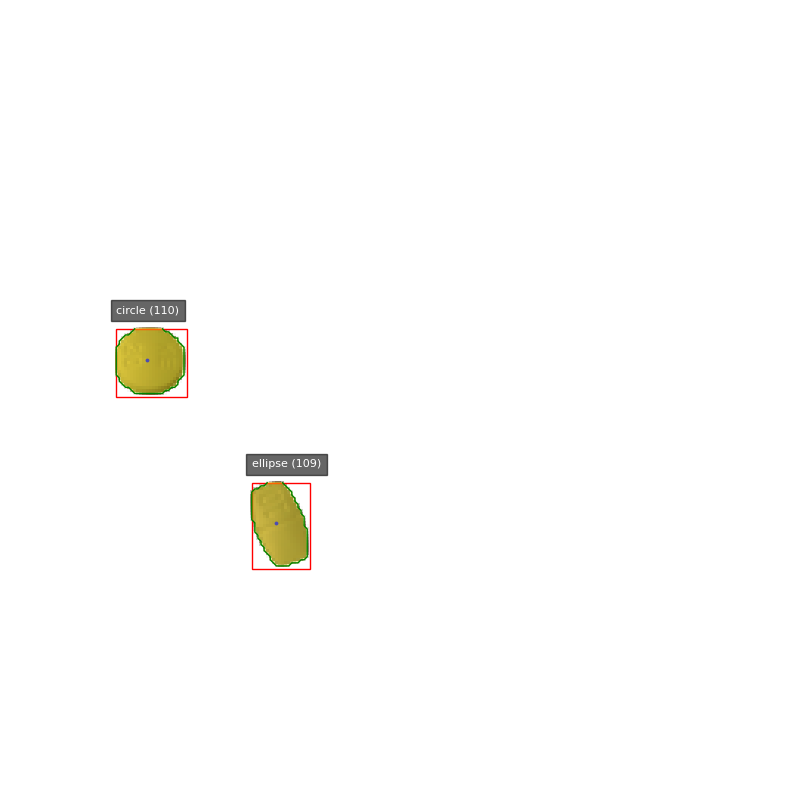

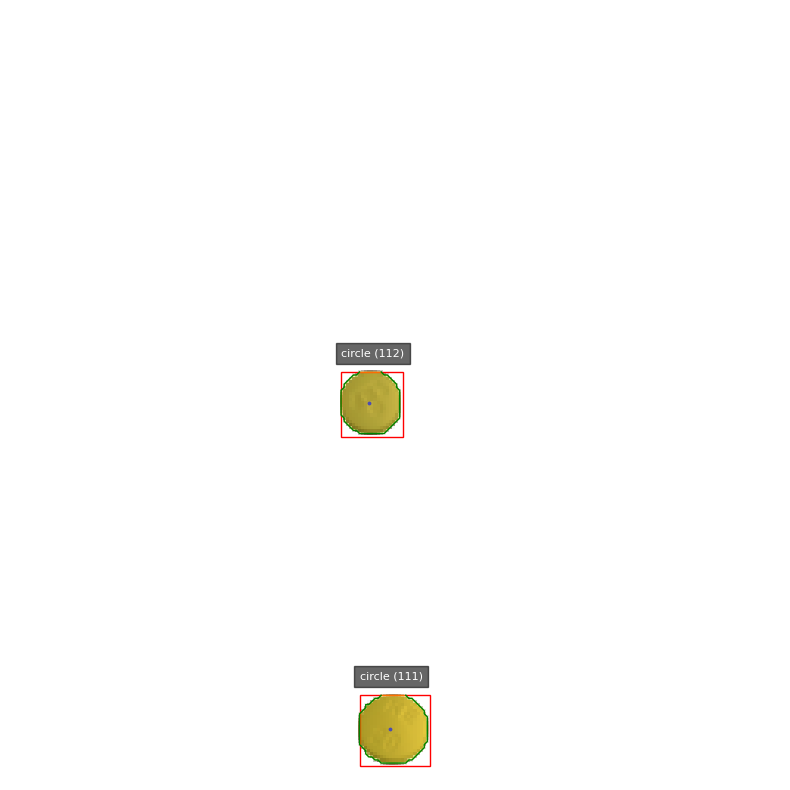

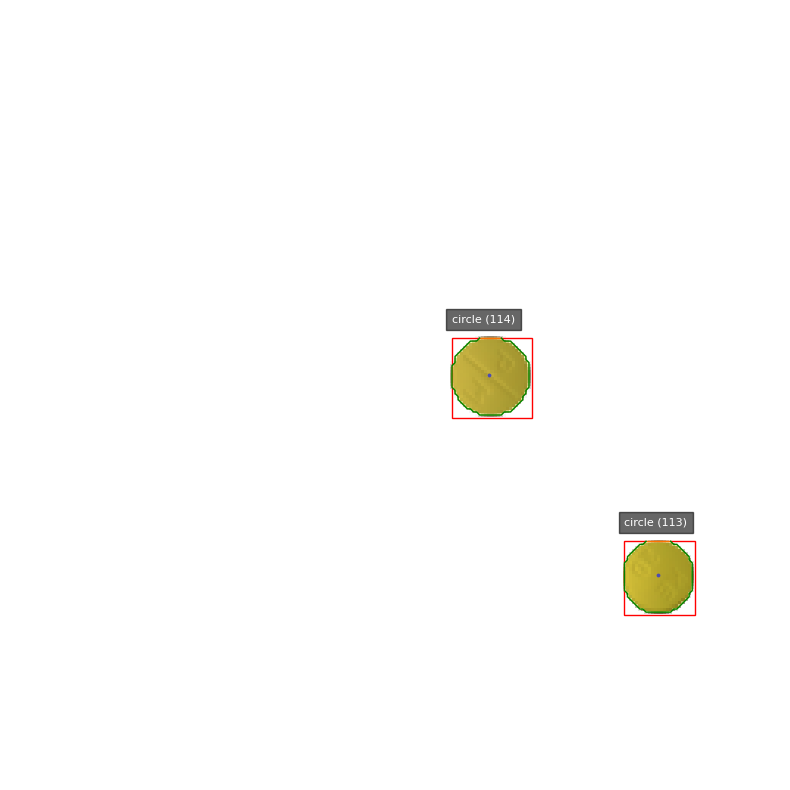

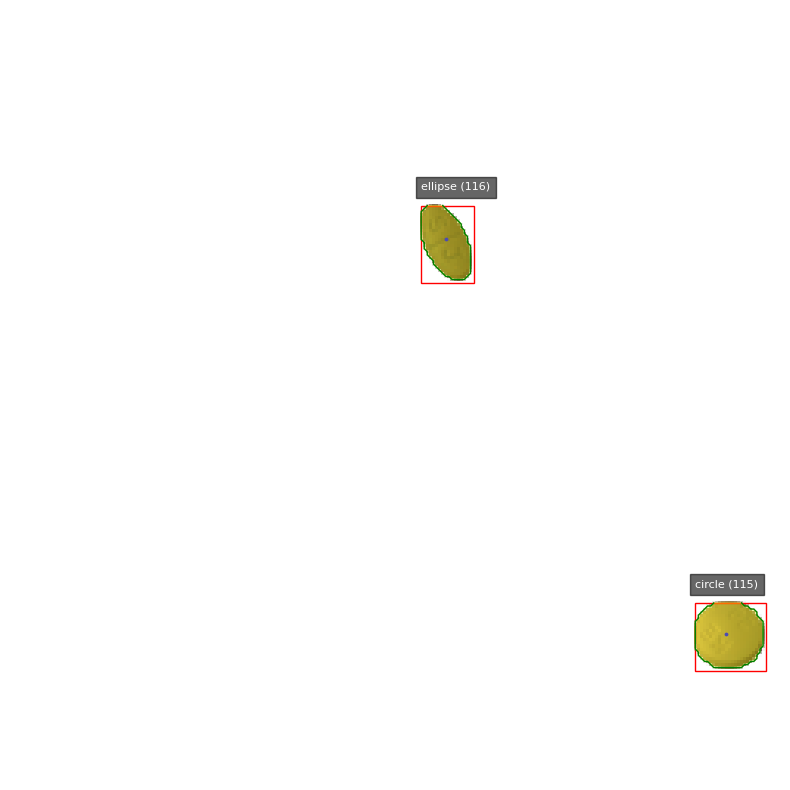

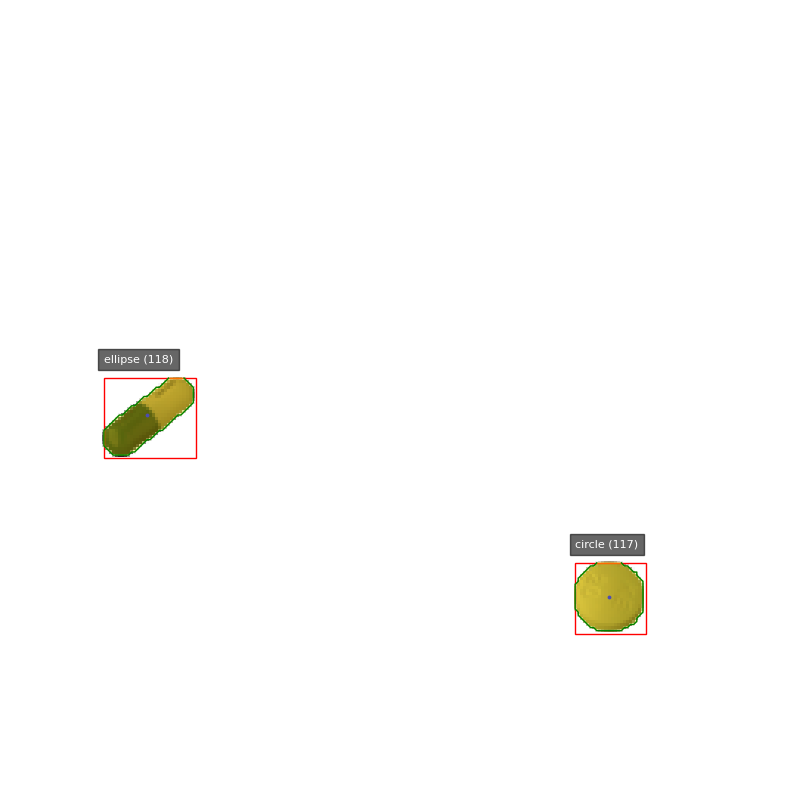

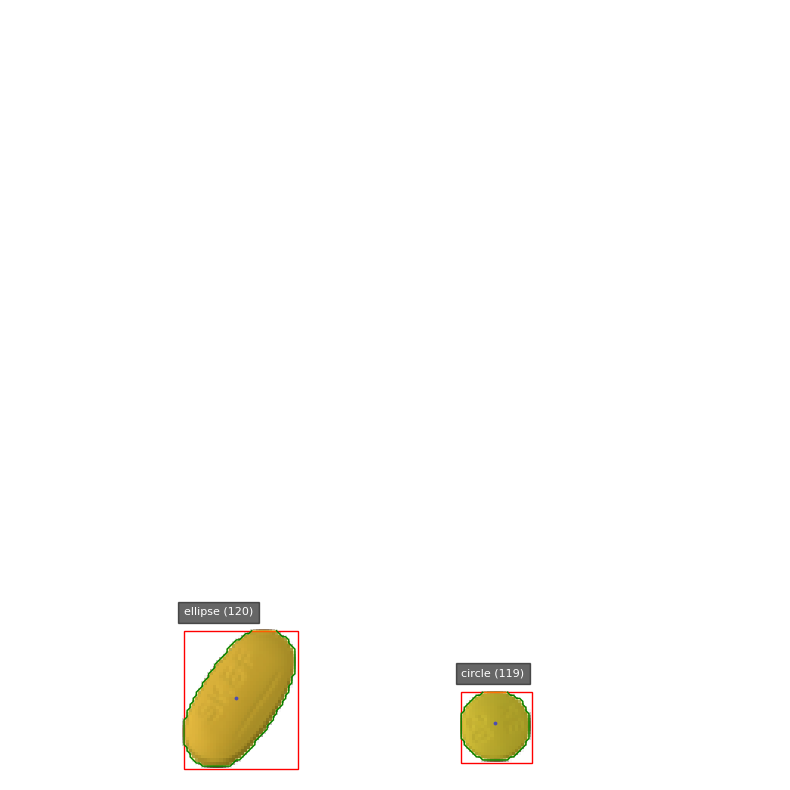

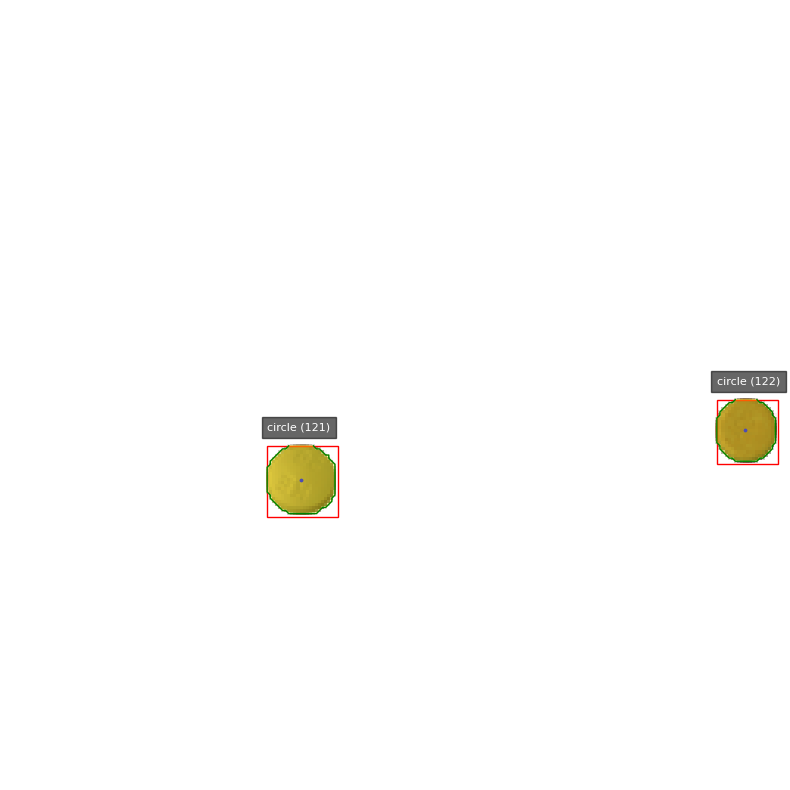

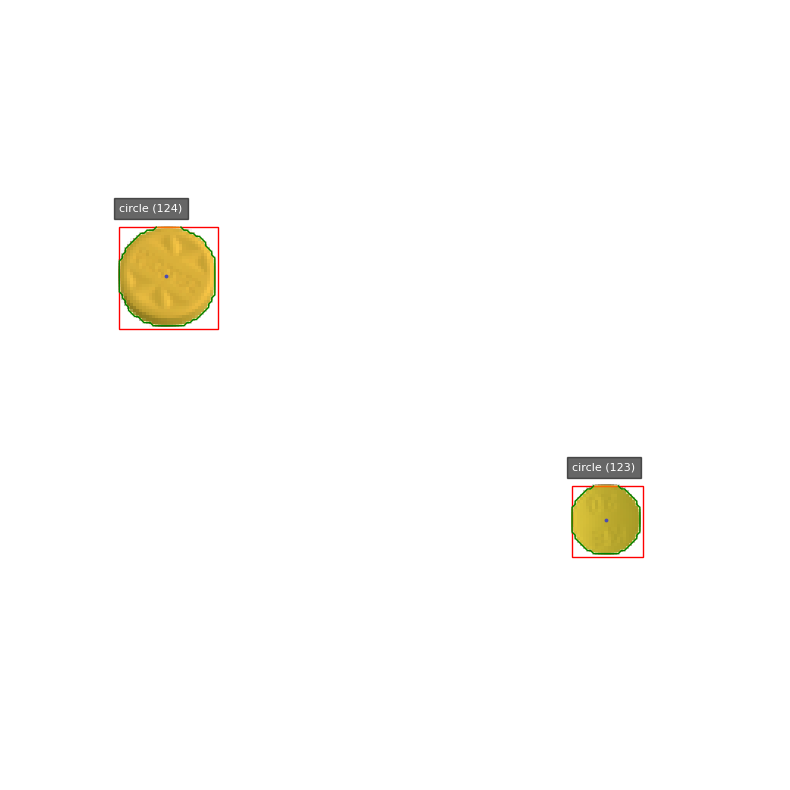

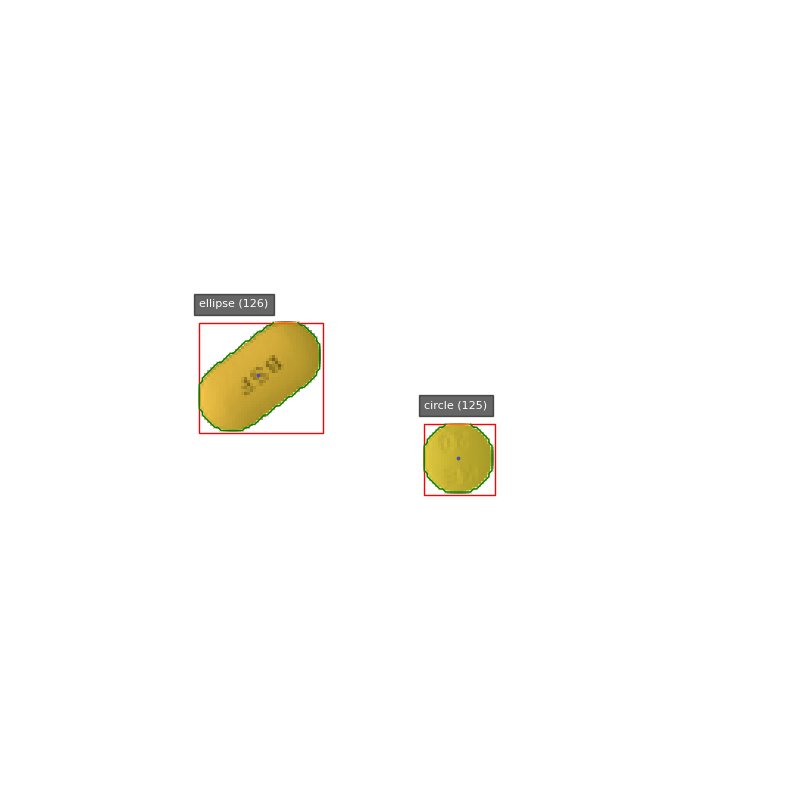

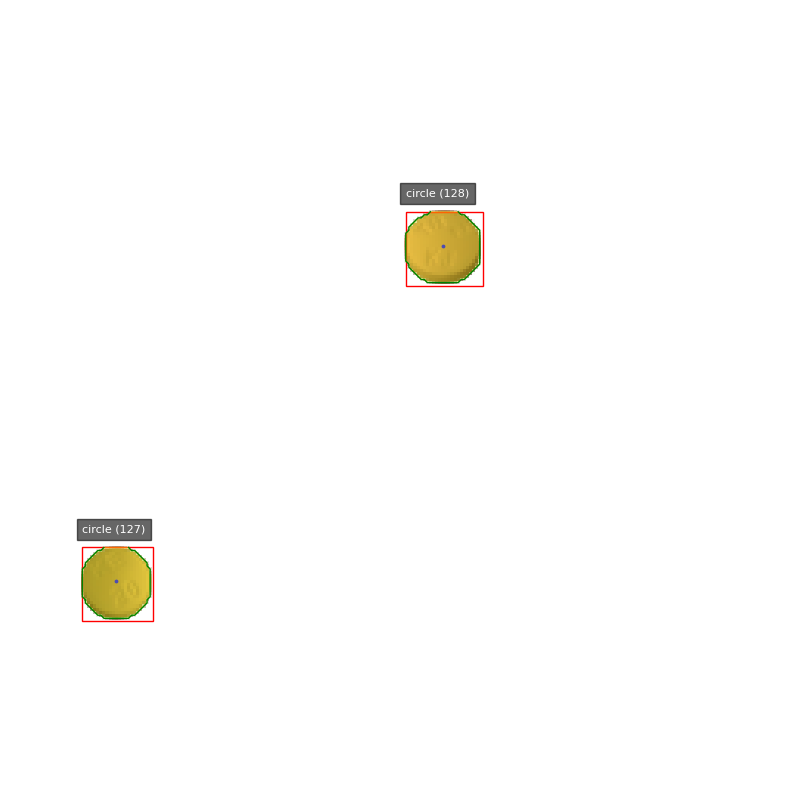

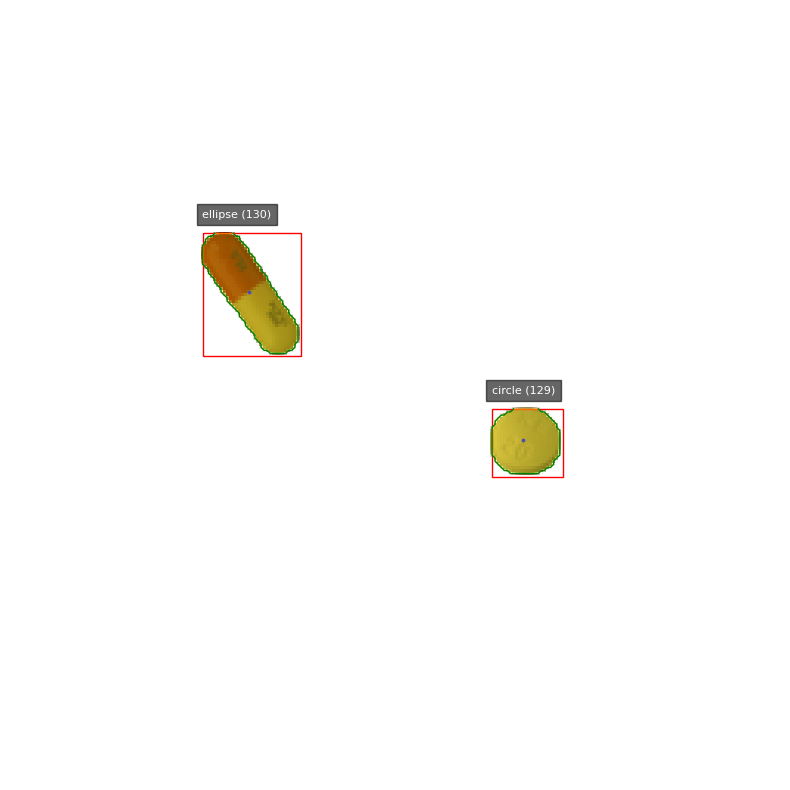

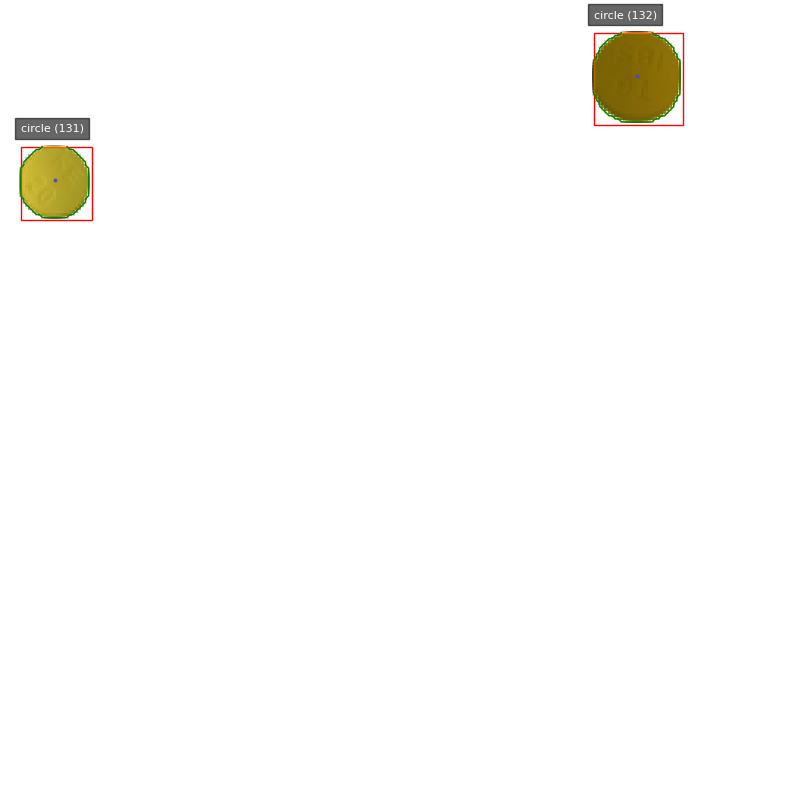

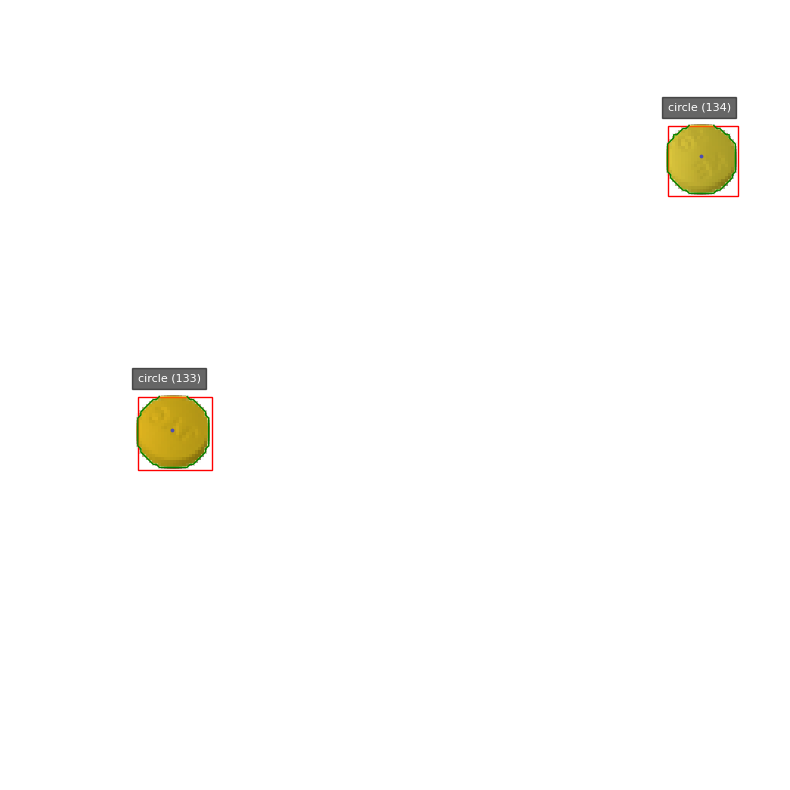

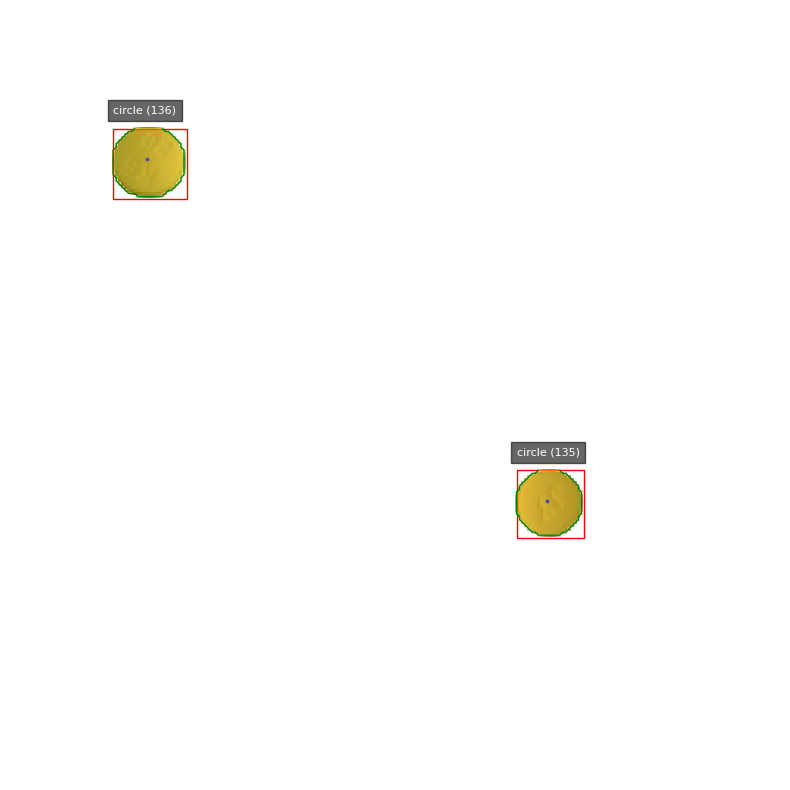

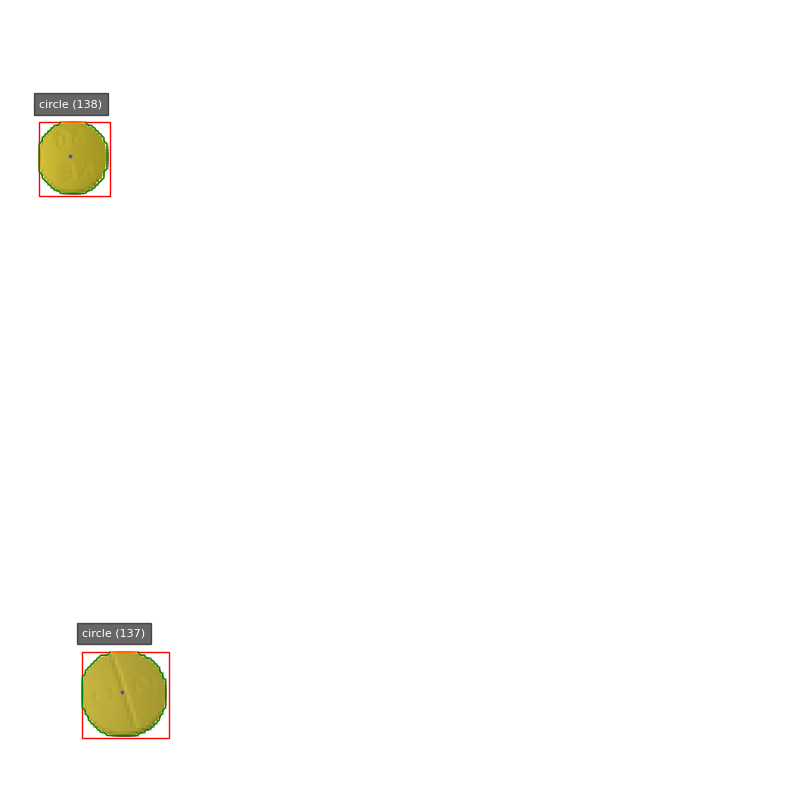

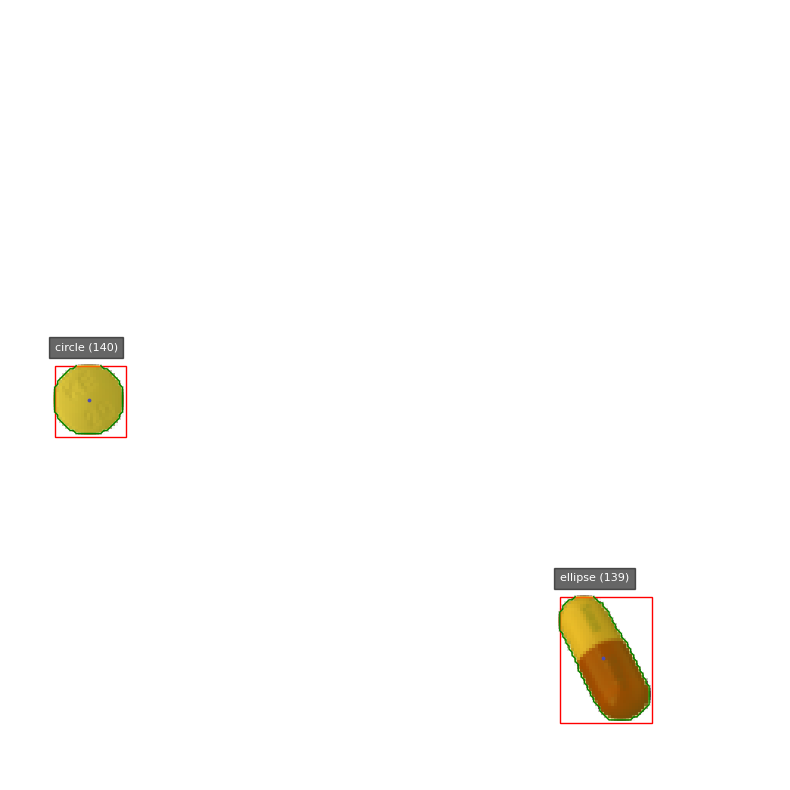

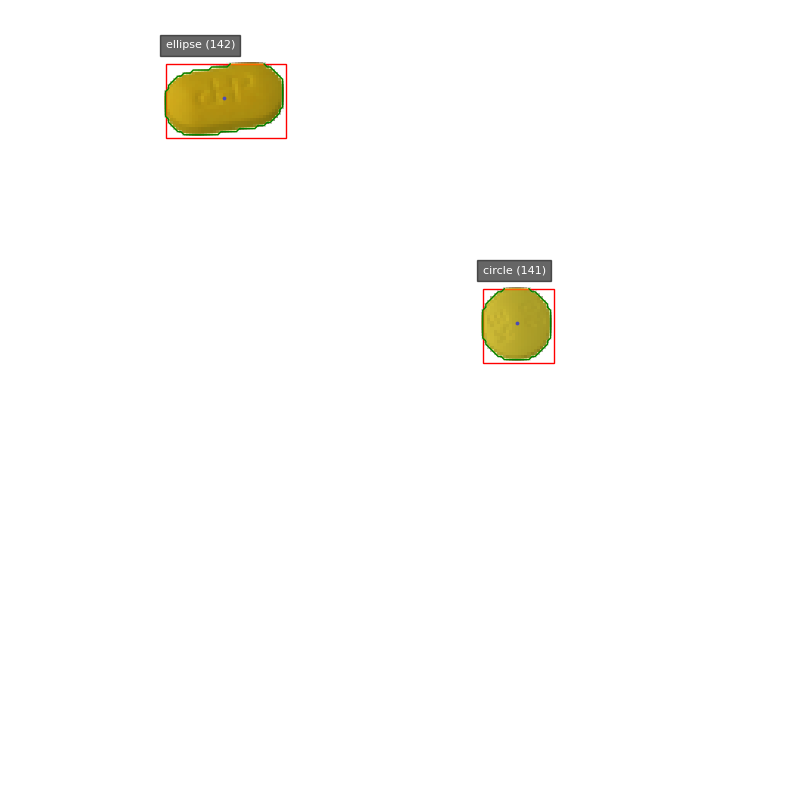

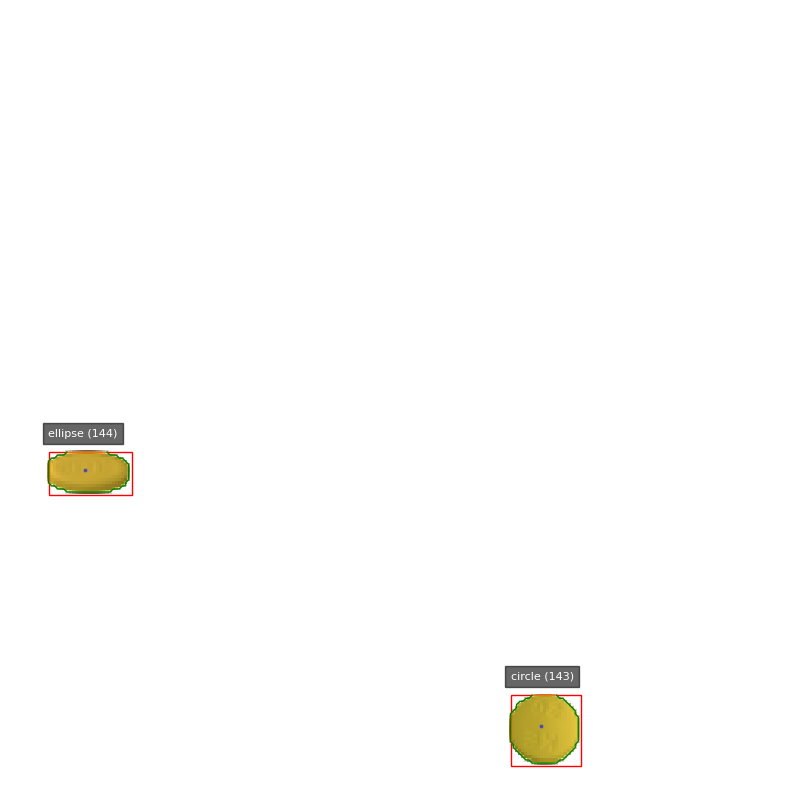

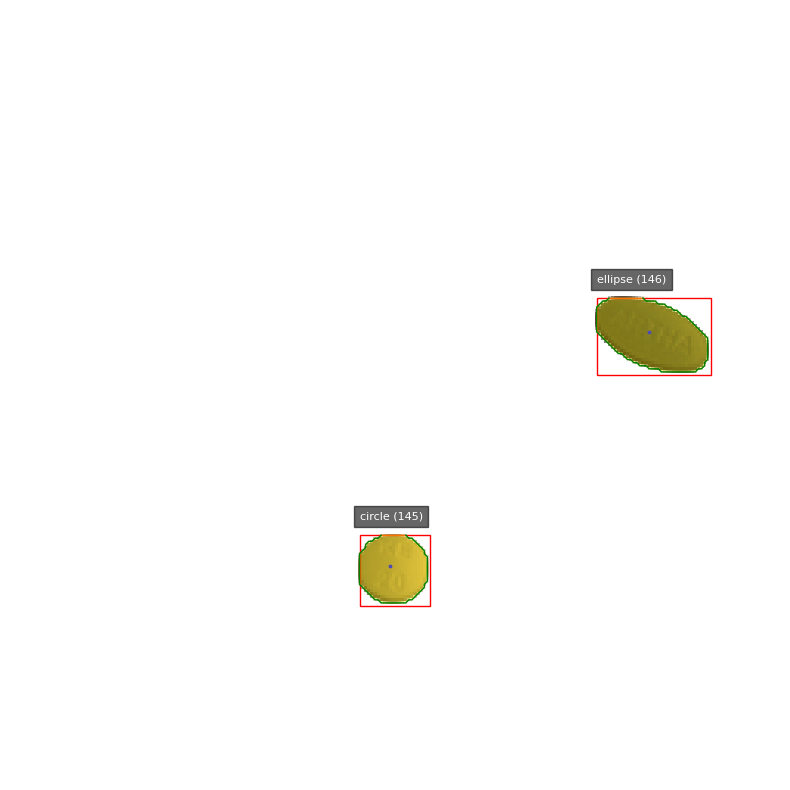

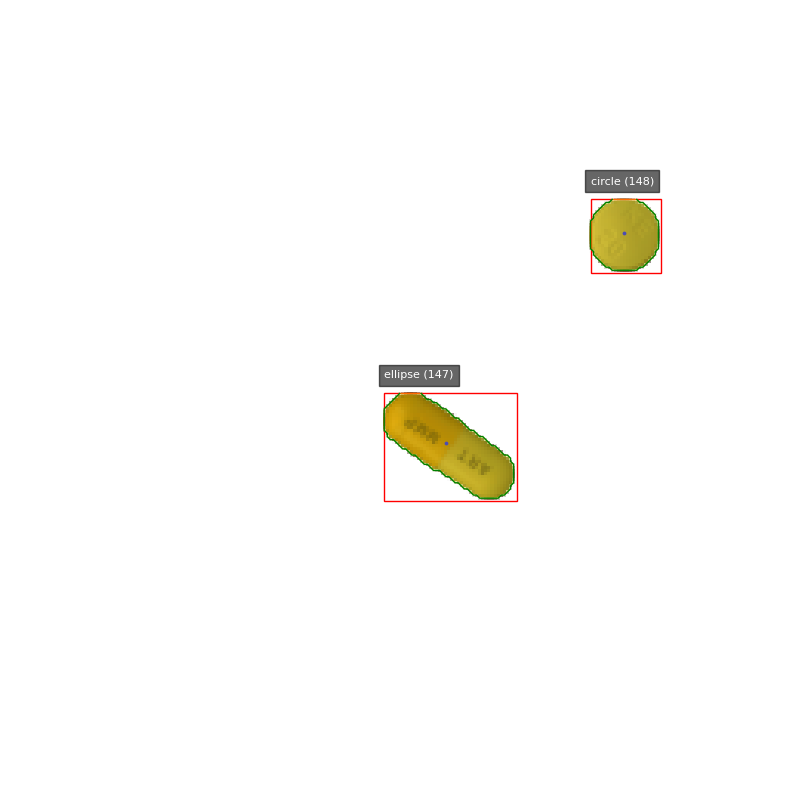

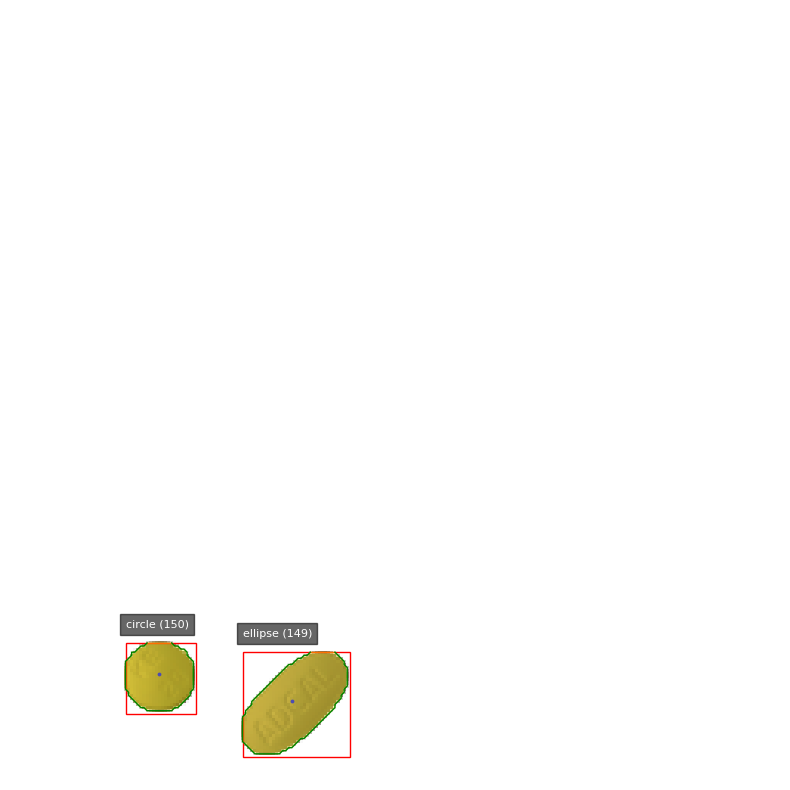

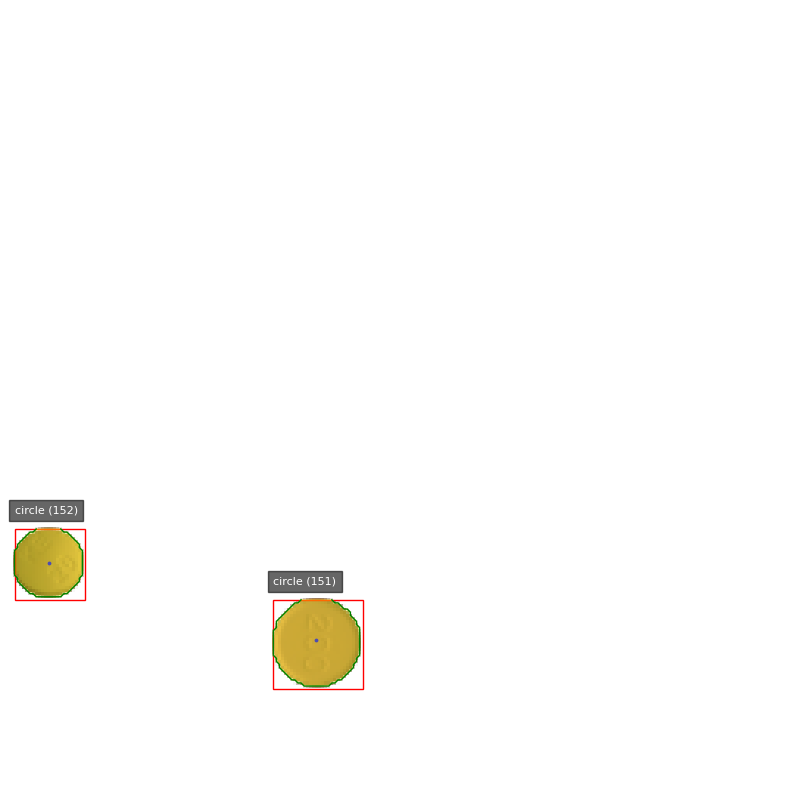

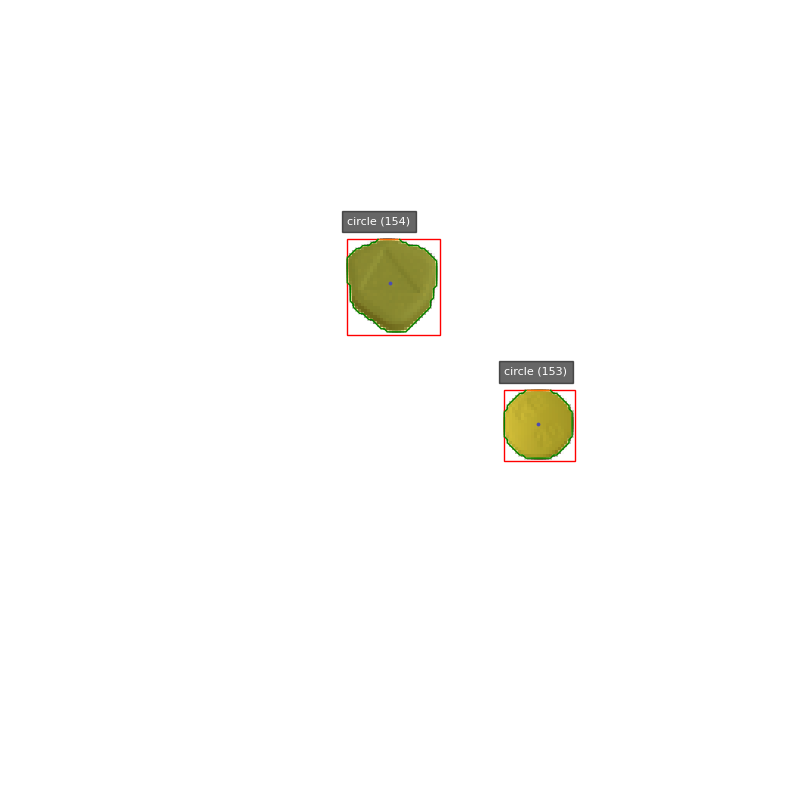

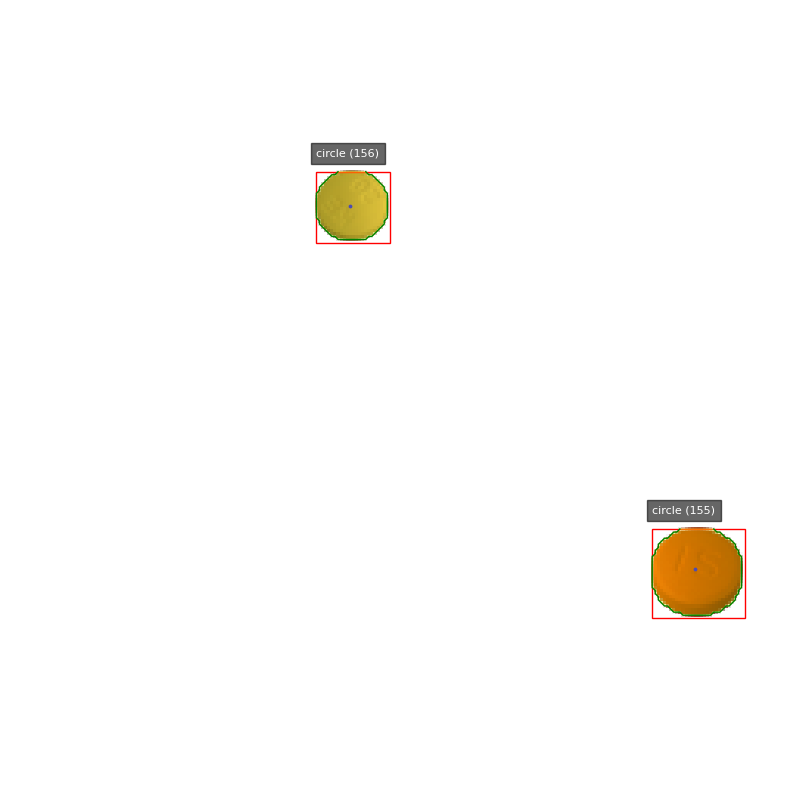

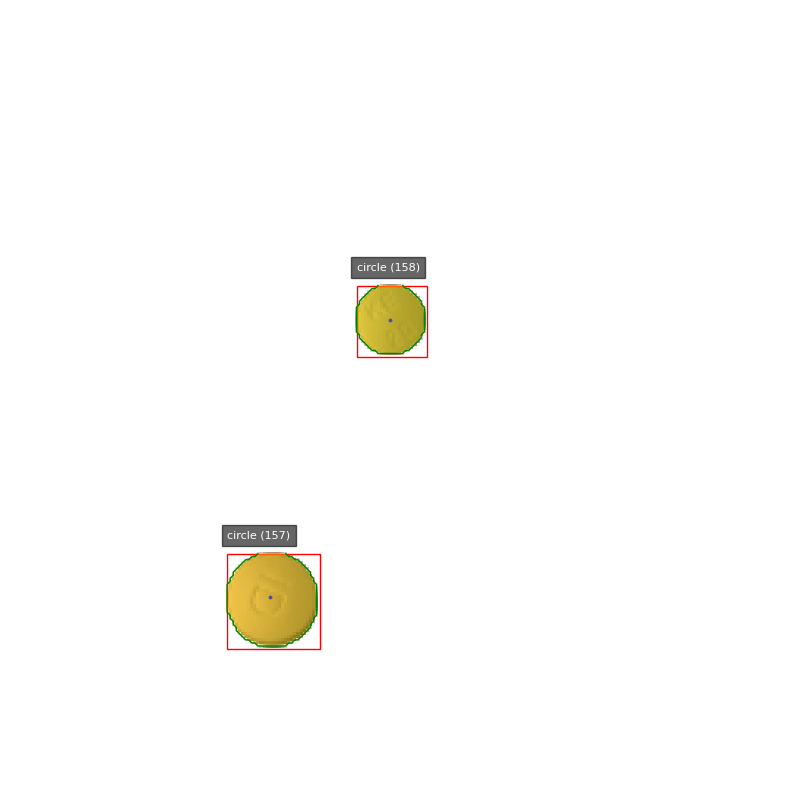

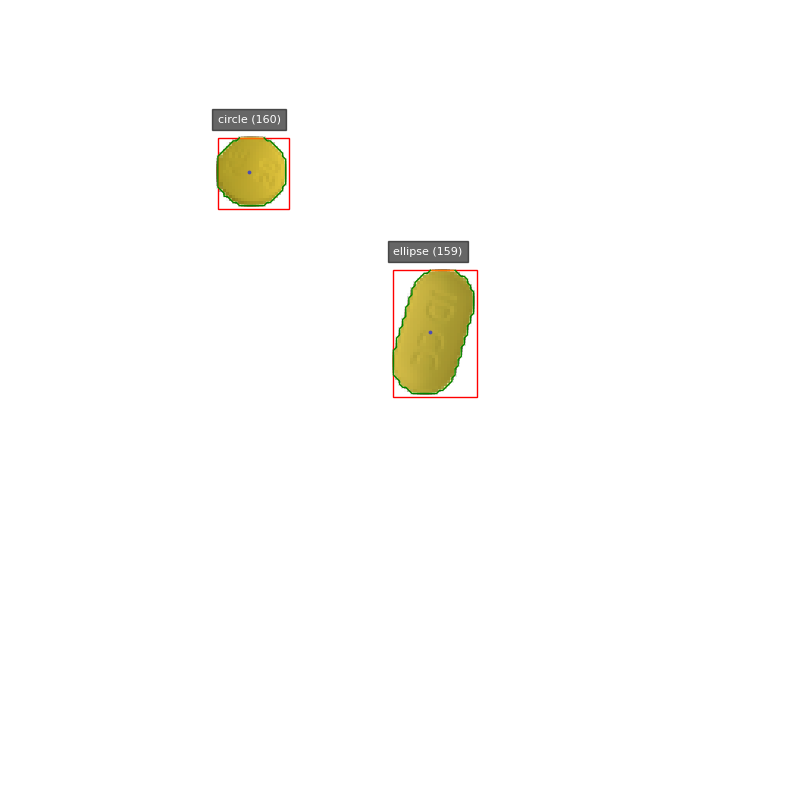

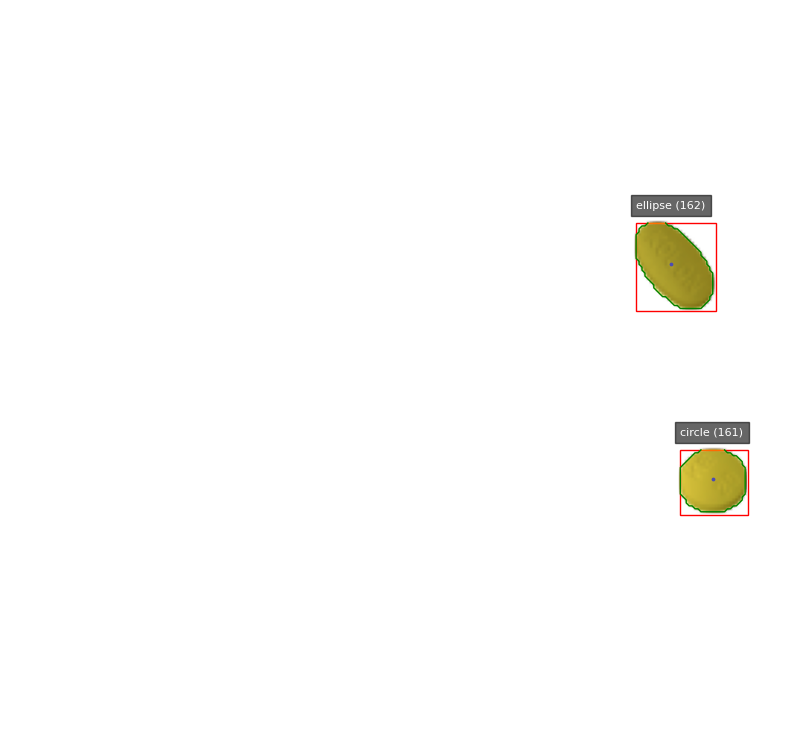

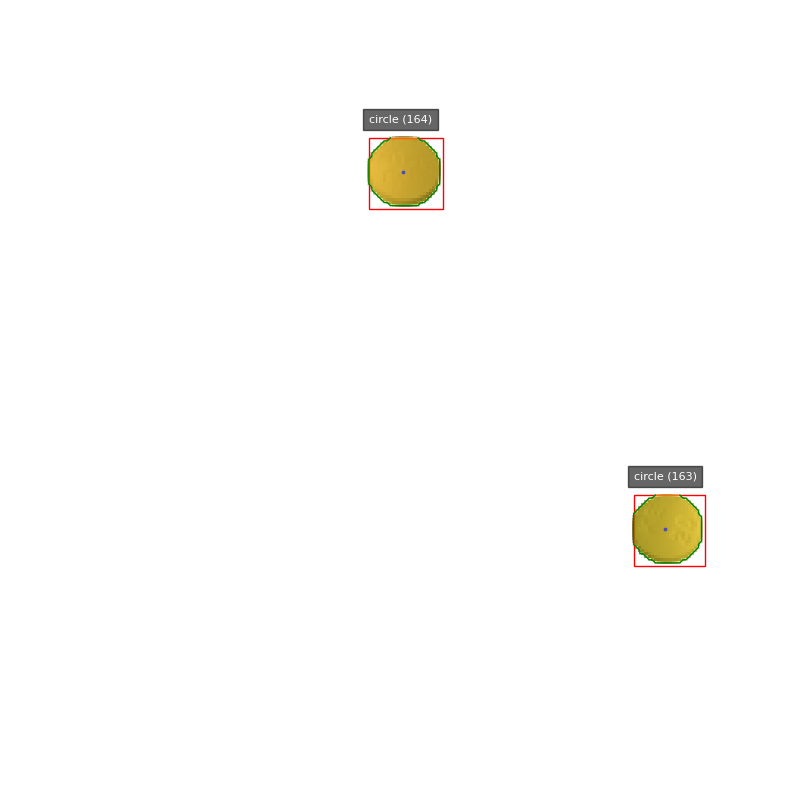

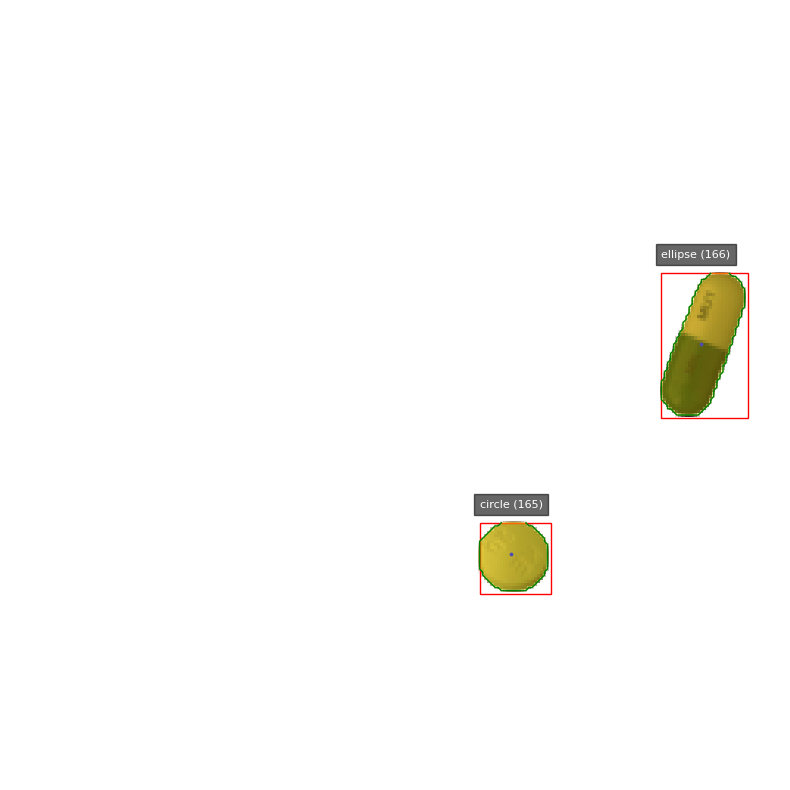

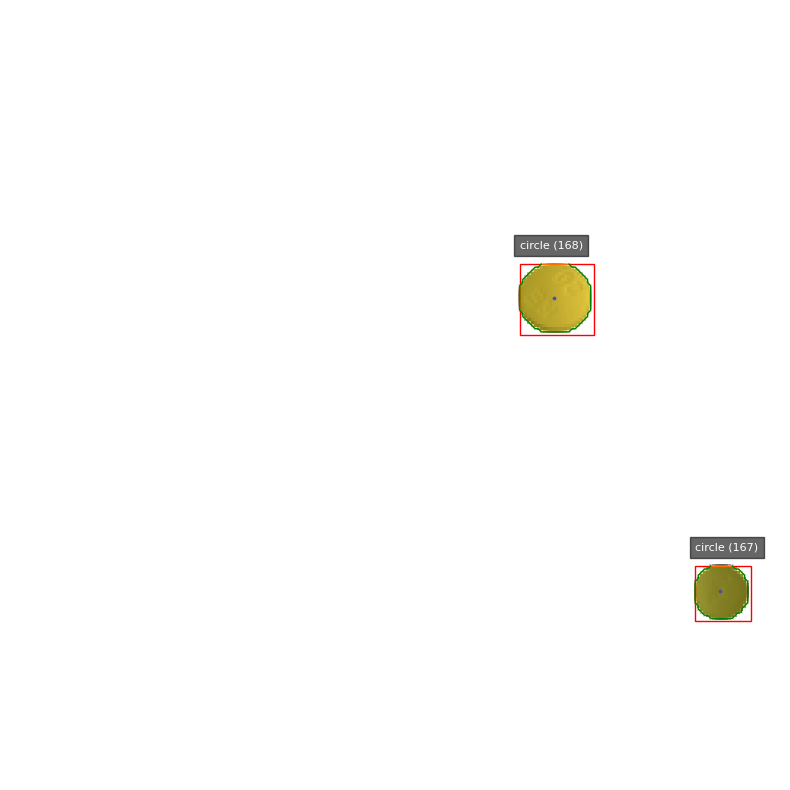

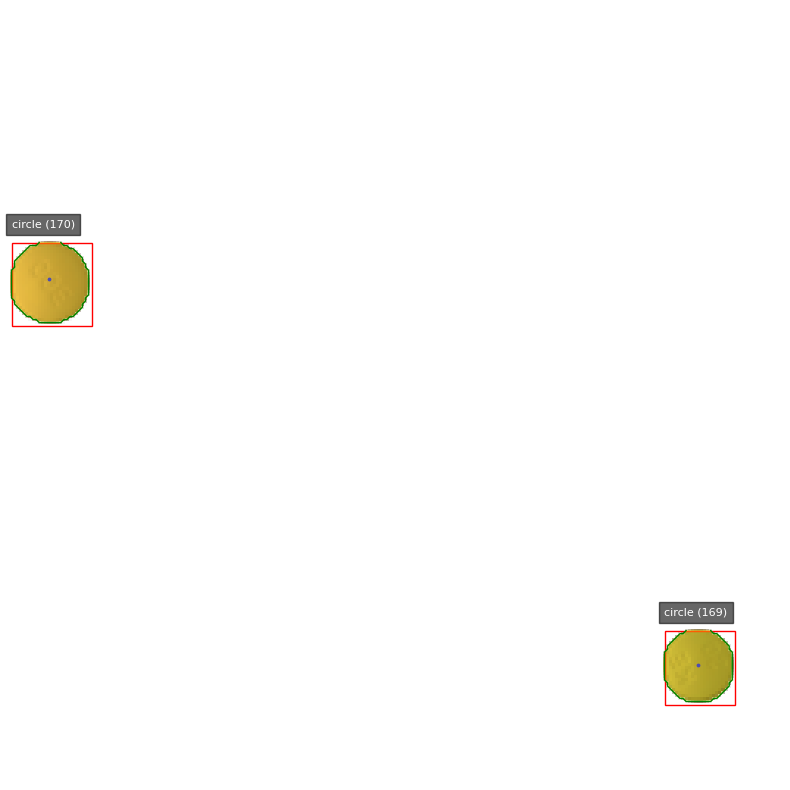

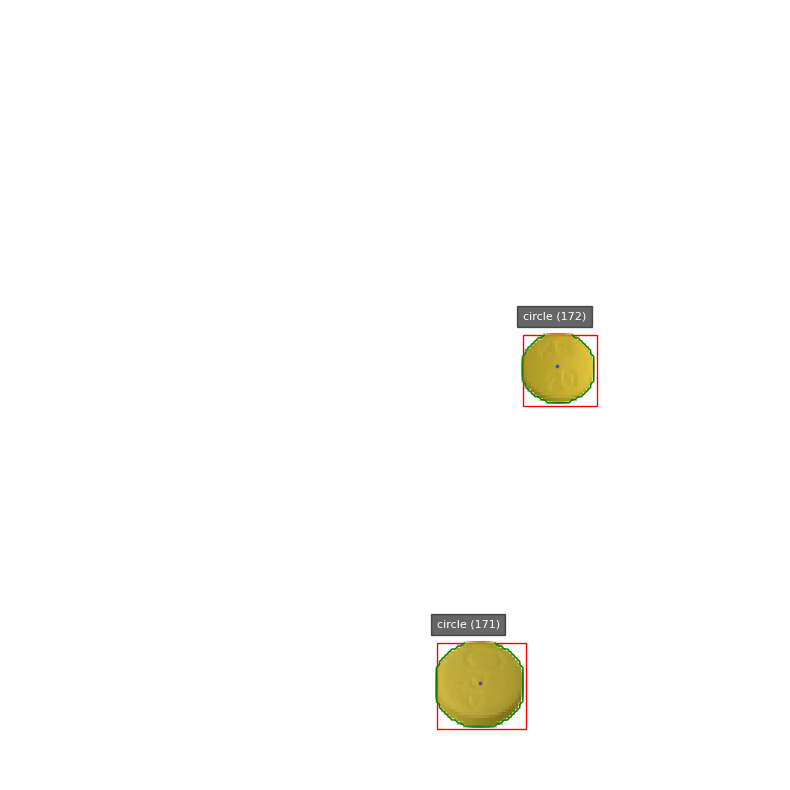

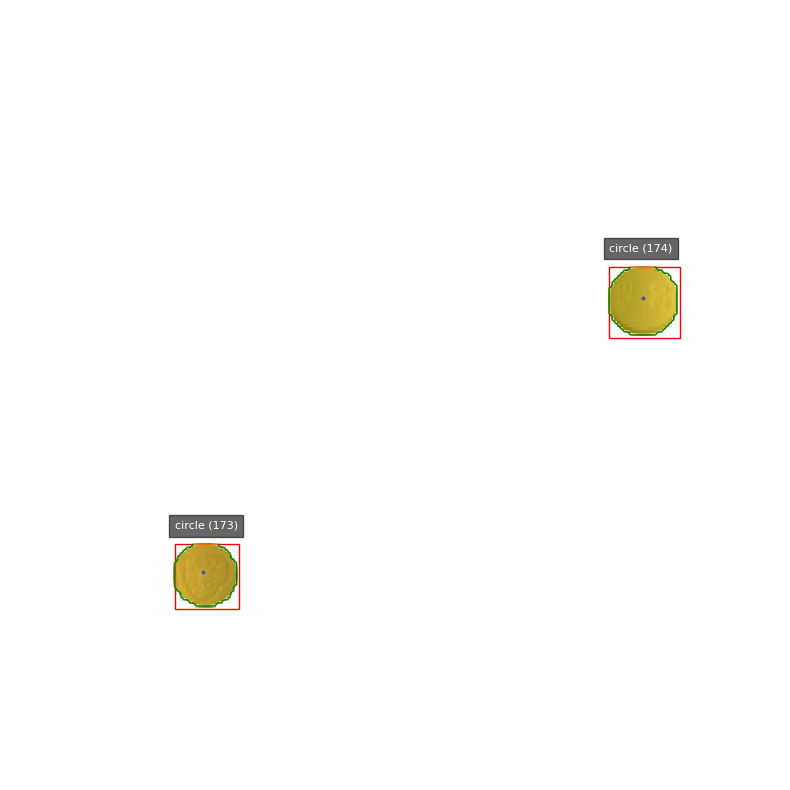

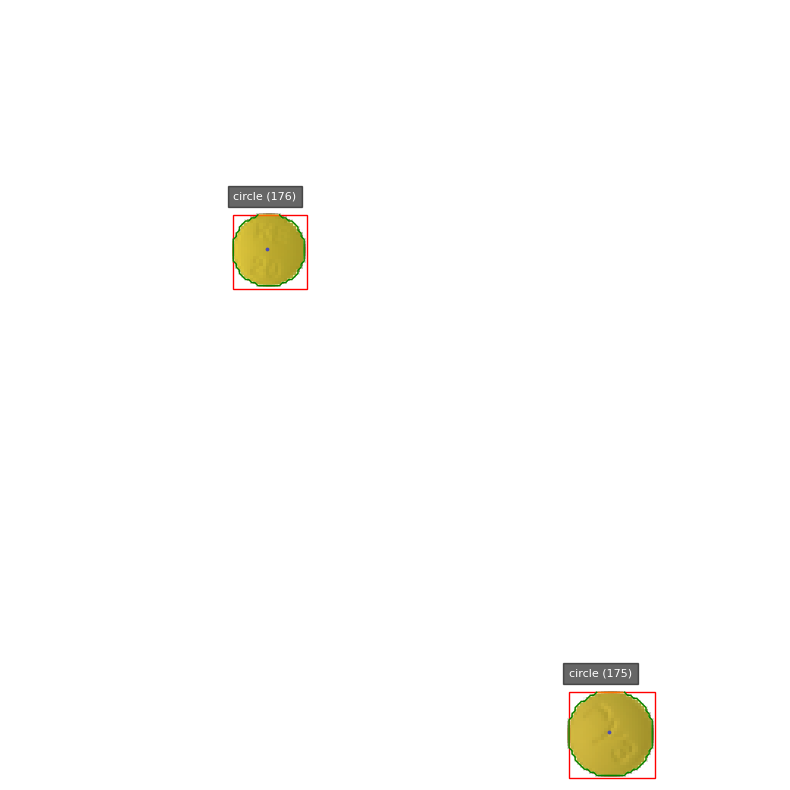

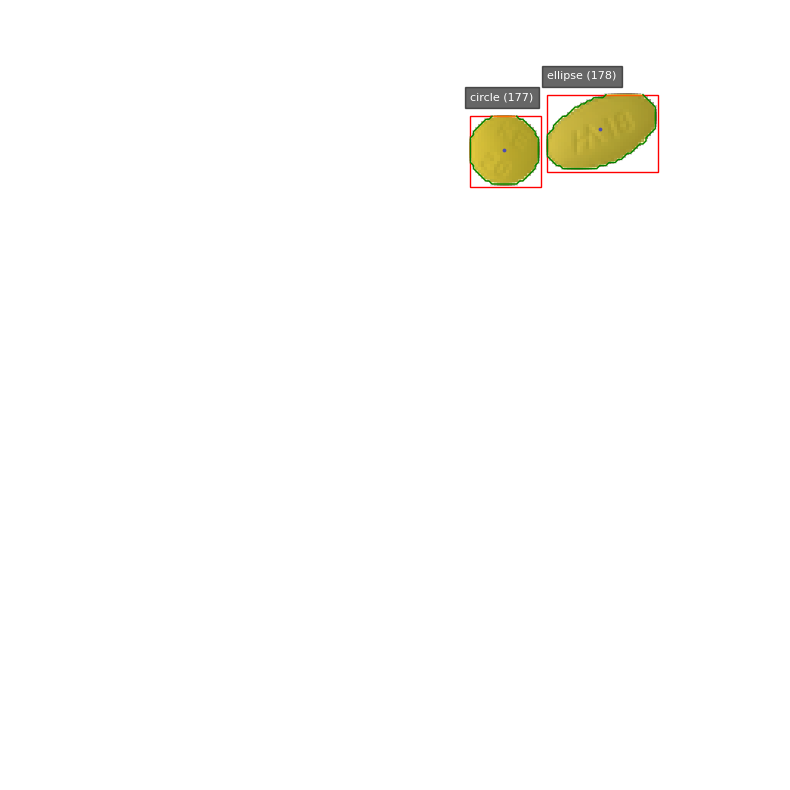

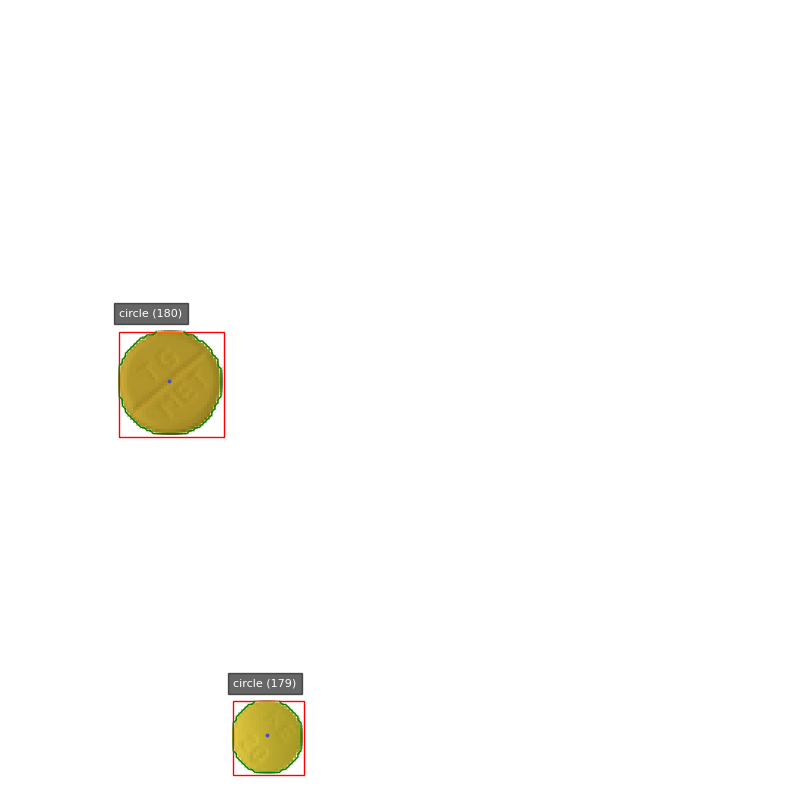

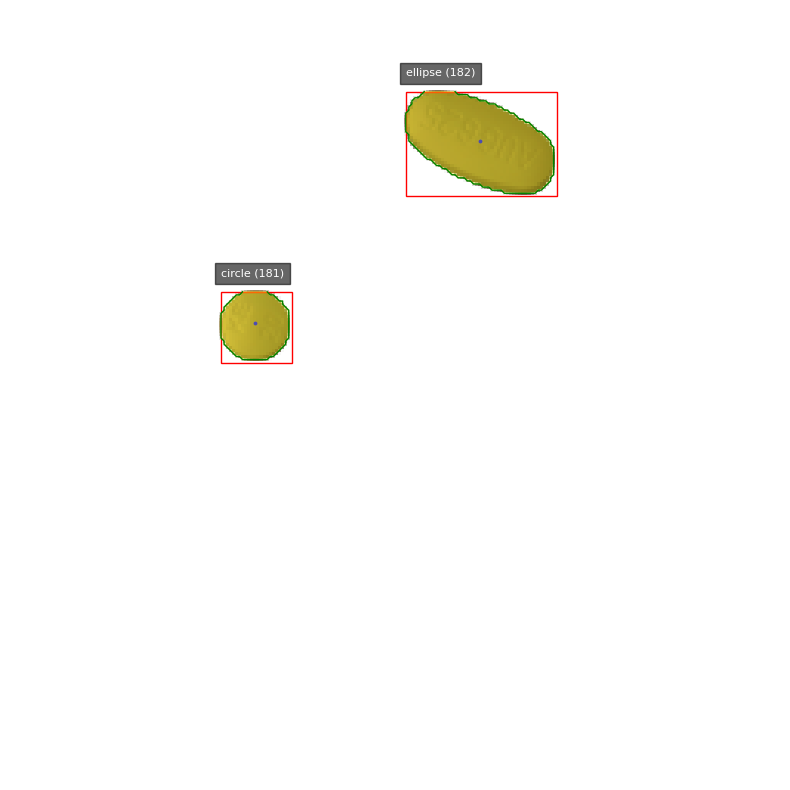

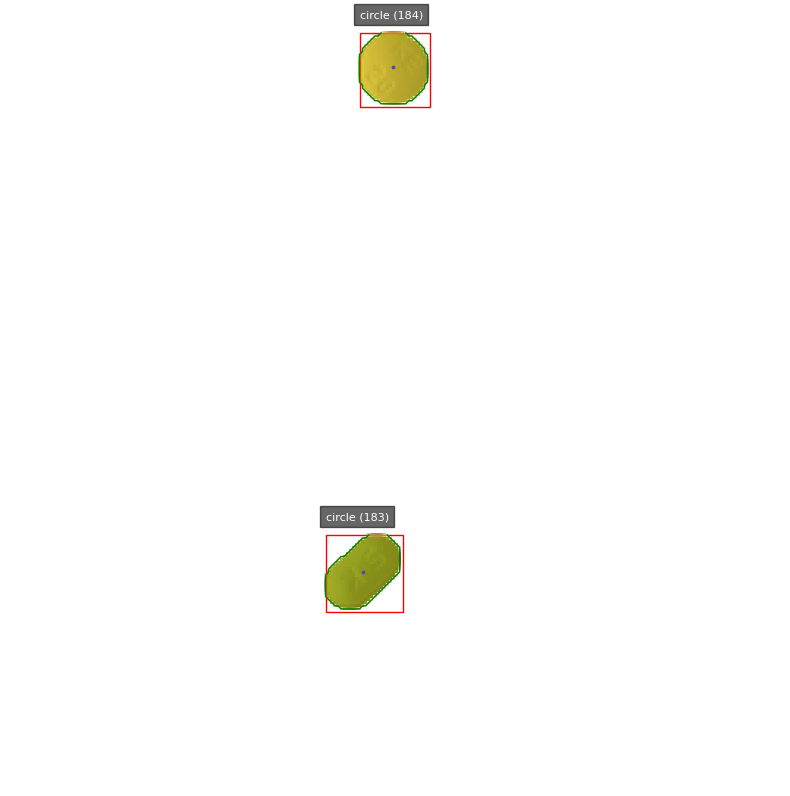

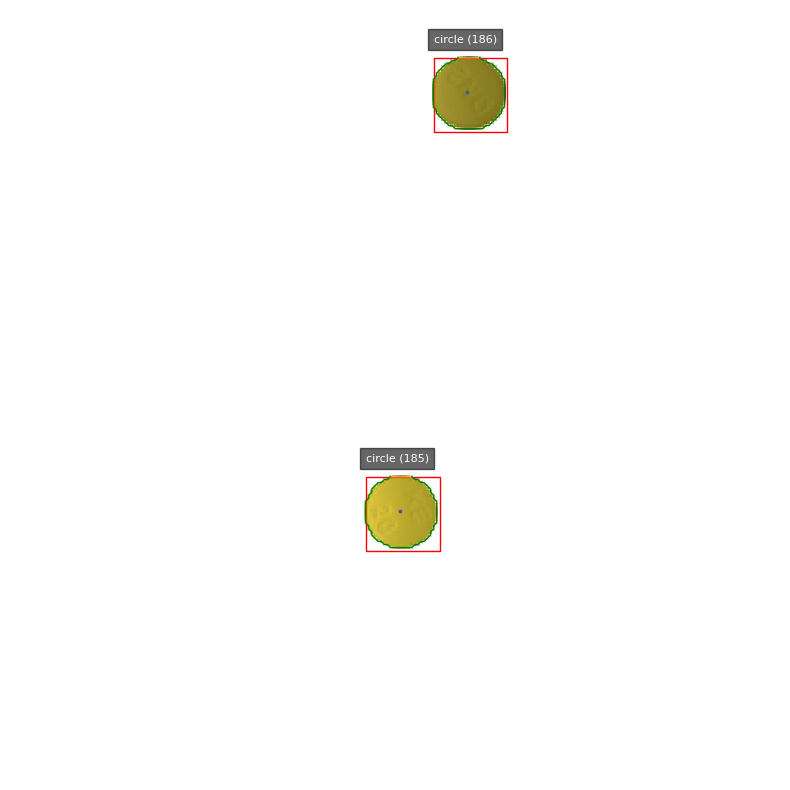

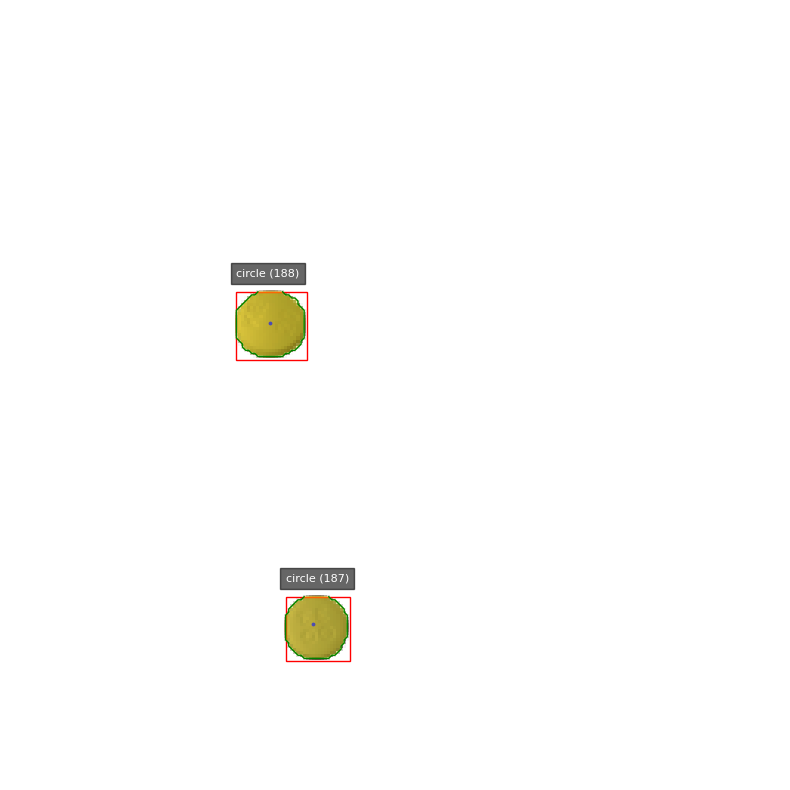

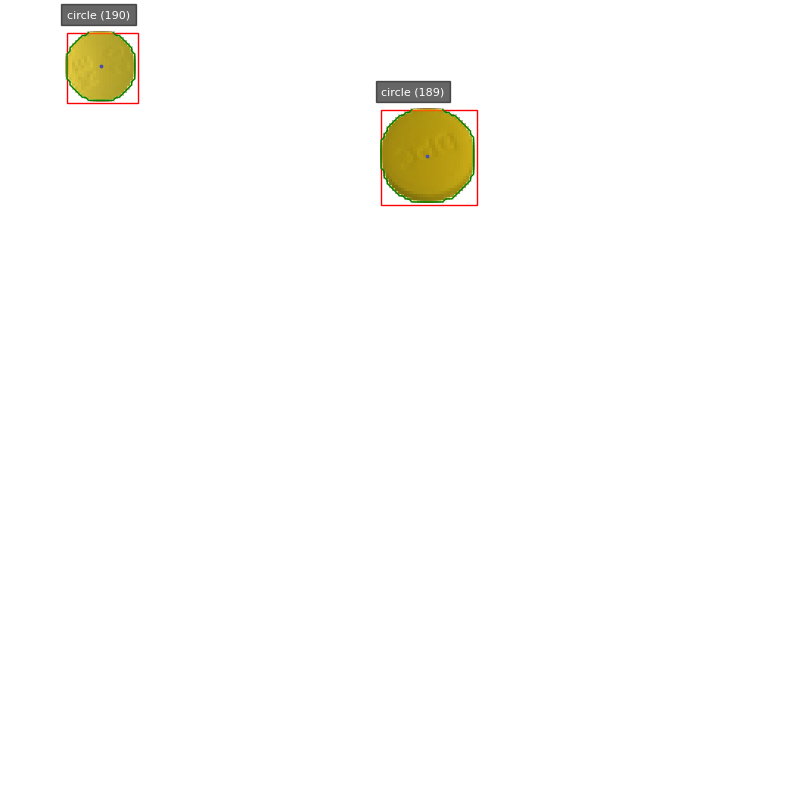

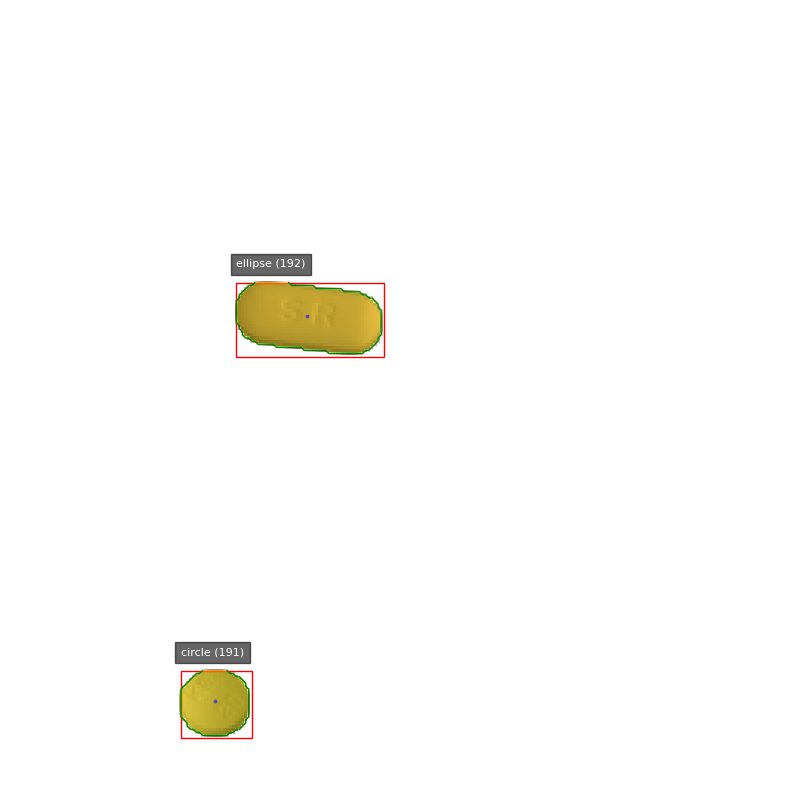

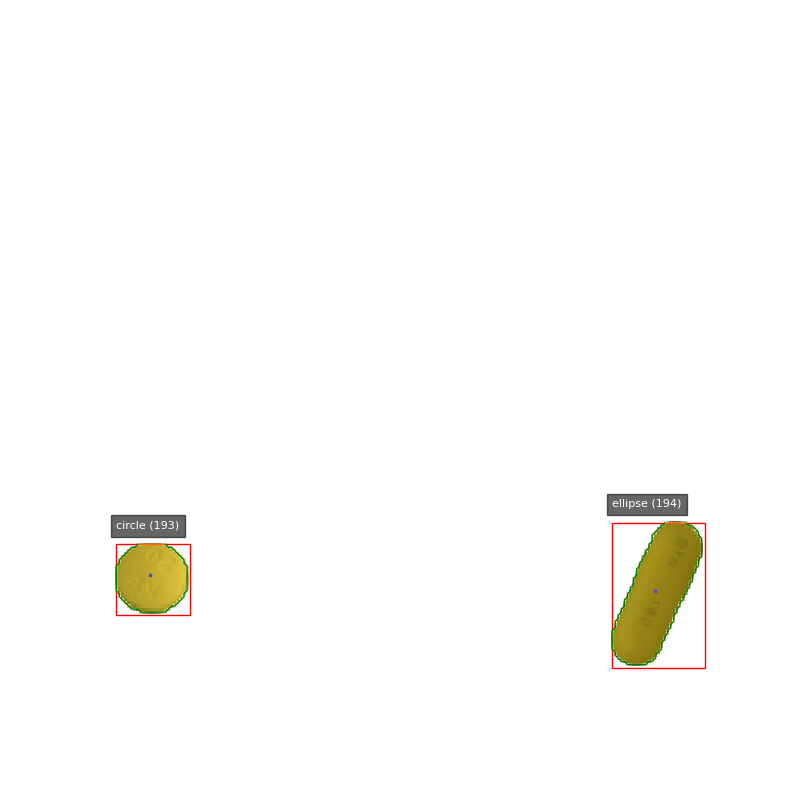

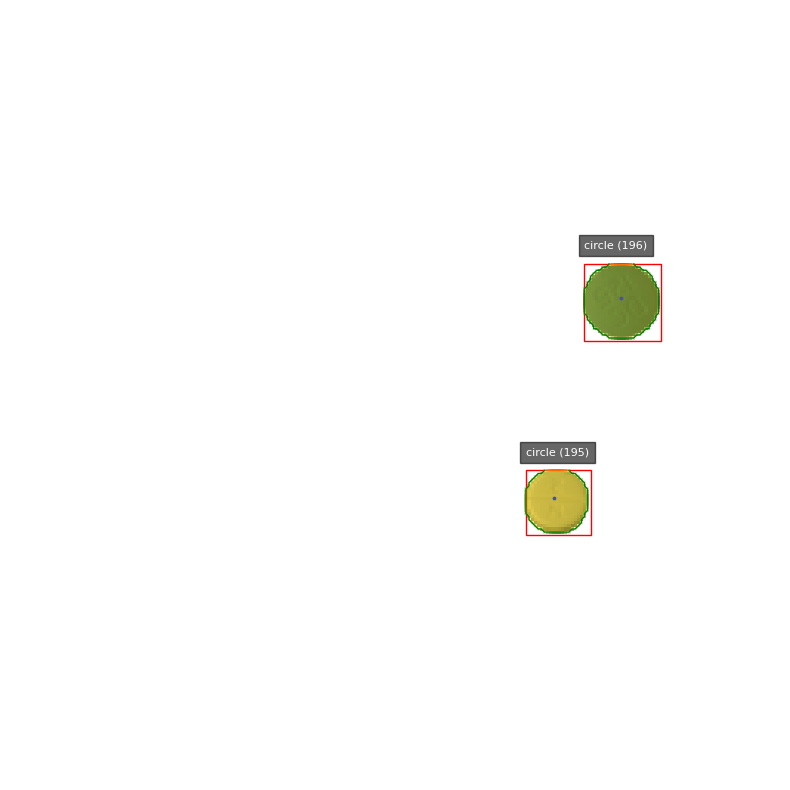

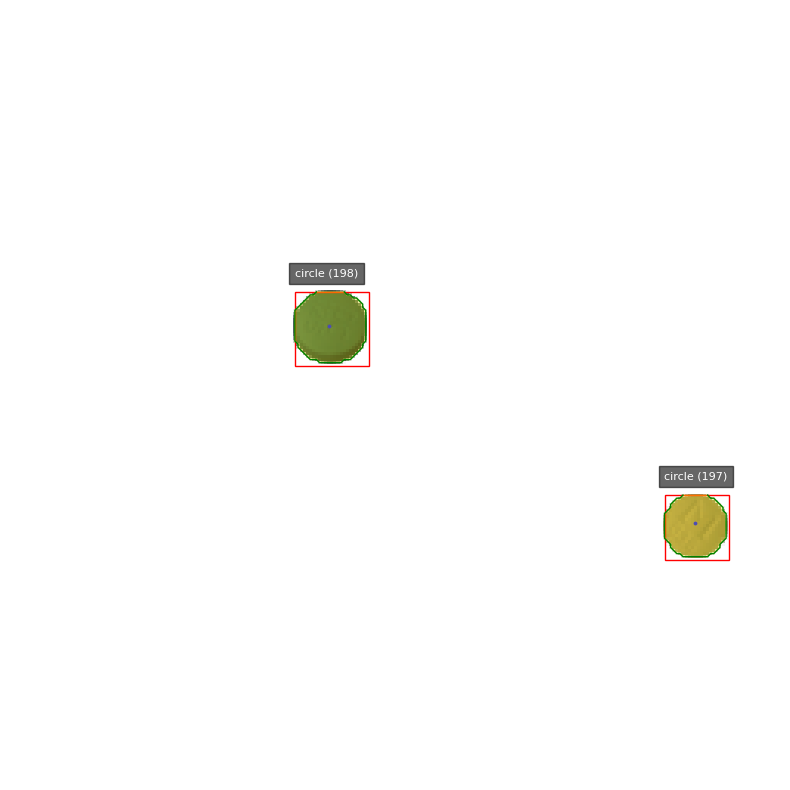

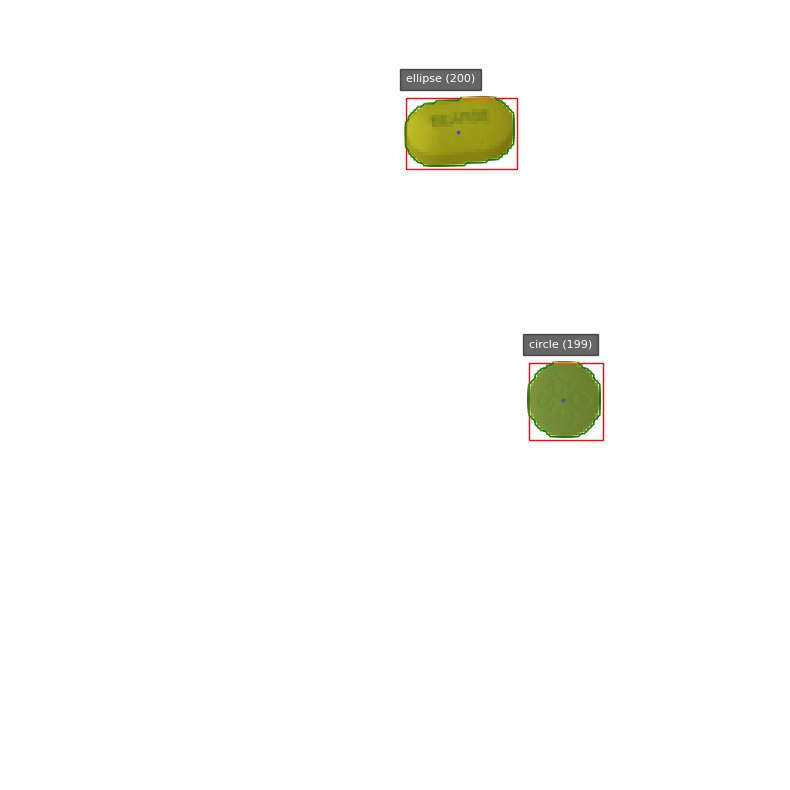

In [50]:
for image_info in datasets["images"]:
    image_path = image_info["file_path"]
    
    # ✅ 해당 이미지의 모든 어노테이션 가져오기
    annotations = [ann for ann in datasets["annotations"] if ann["image_id"] == image_info["id"]]

    print(f"🔹 파일: {image_path}")
    print(f"🔹 크기: {image_info['width']} x {image_info['height']}")
    print(f"🔹 알약 개수: {image_info['pill_count']}")
    print(f"🔹 종류: {image_info['kind_of_pills']}\n")

    draw_annotations("datasets/pills/" + image_path, annotations)